### Importing Packages

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import matplotlib.pyplot as plt

### Dataset Preparation

100%|██████████| 26421880/26421880 [00:02<00:00, 11615203.19it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 289806.45it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4846218.19it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9583789.17it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



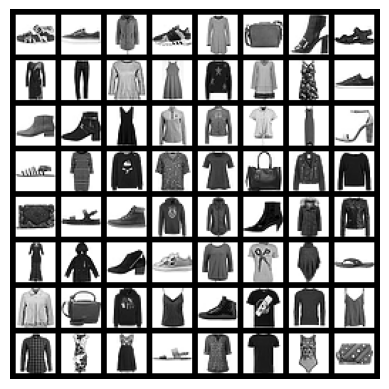

In [2]:
# Pick a seed
torch.manual_seed(42)

# Defining Transformer, Normalizing Image values between -1, 1
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load Fashion Set
trainset = torchvision.datasets.FashionMNIST(root=".", train=True, download=True, transform=transform)

batch_size = 64

# Create the dataloader objects
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

# Visualize the Data
images, labels = next(iter(trainloader))
grid = make_grid(0.5 - images / 2, 8, 4)
plt.imshow(grid.numpy().transpose((1, 2, 0)), cmap="gray_r")
plt.axis("off")
plt.show()

### Gan Architecture

In [3]:
# Defining the Generator
class Generator(nn.Module):
    def __init__(self, input_size=100, hidden_dim=256, output_size=28*28):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim * 2, hidden_dim * 3),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim * 3, output_size),
            nn.Tanh()
        )

    def forward(self, x):
        img = self.net(x)
        img = img.view(img.size(0), 1, 28, 28)
        return img

# Defining the Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_size=28*28, hidden_dim=256, output_size=1):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim * 2, output_size),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.net(img_flat)
        return validity

# Setting device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initializing the generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)


### Loss and Optimizer

In [4]:
# Define the Loss Function
criterion = nn.BCELoss()

# Defining the Learning Rate
learning_rate = 0.0002

# Defining the Optimizer
g_optimizer = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

### Training Loop

Epoch [1/50] | Generator Loss: 1.3891 | Discriminator Loss: 0.4755


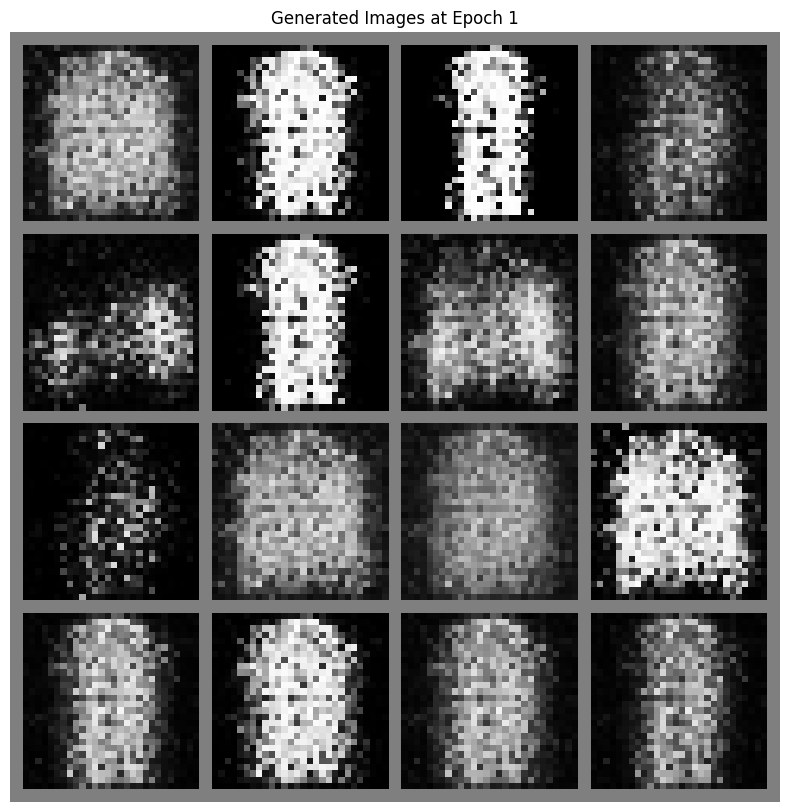

Epoch [2/50] | Generator Loss: 1.8152 | Discriminator Loss: 0.4720


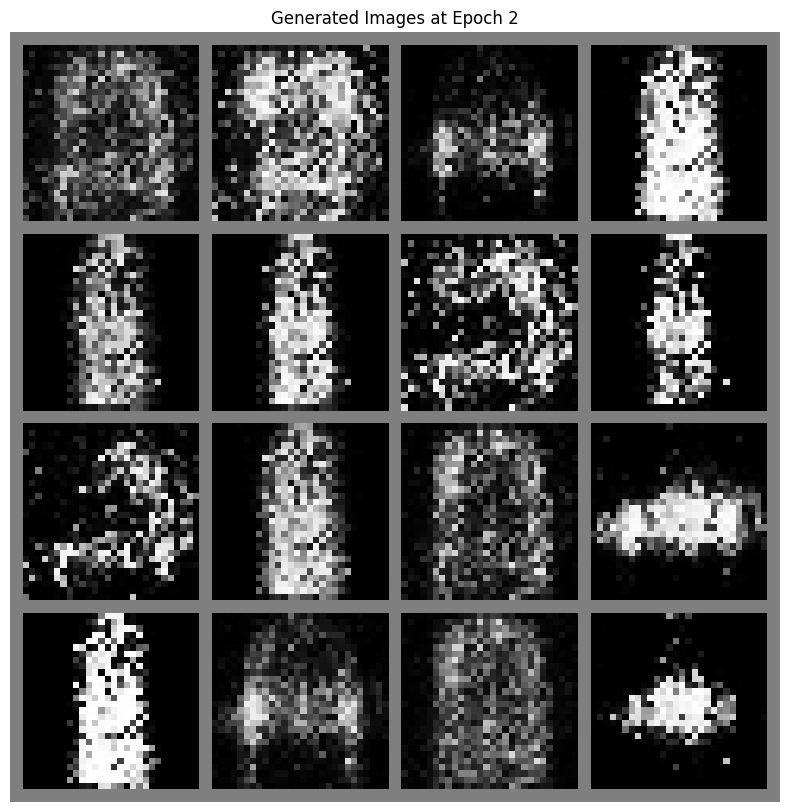

Epoch [3/50] | Generator Loss: 1.4922 | Discriminator Loss: 0.5250


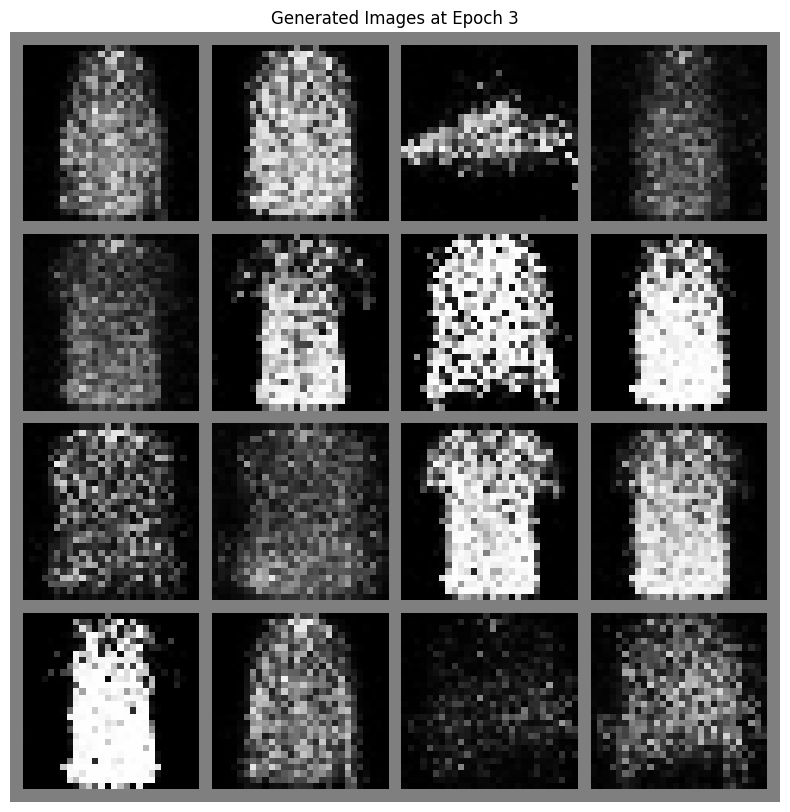

Epoch [4/50] | Generator Loss: 1.2078 | Discriminator Loss: 0.5749


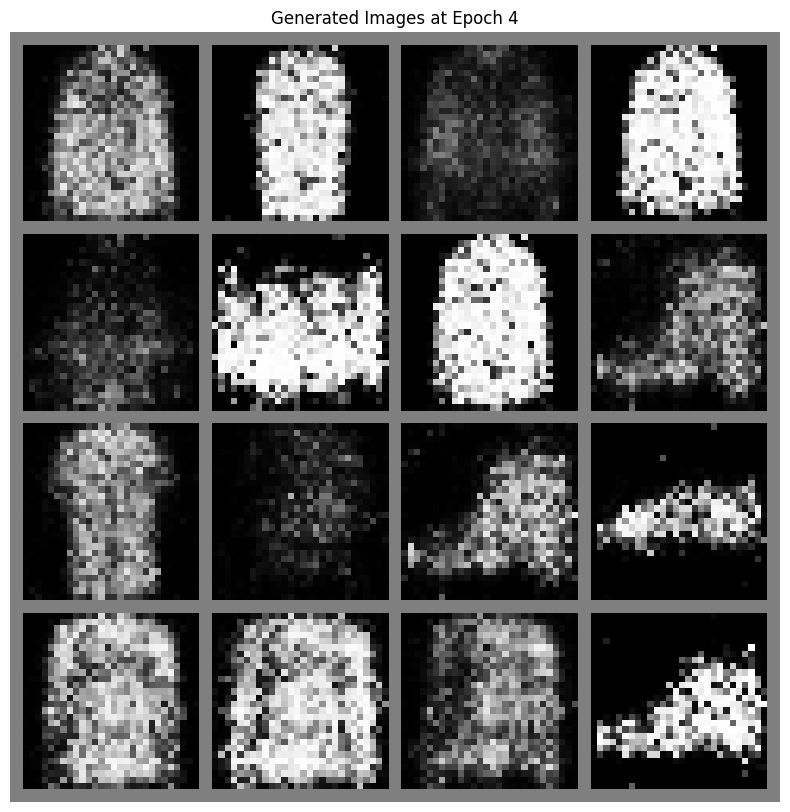

Epoch [5/50] | Generator Loss: 1.0829 | Discriminator Loss: 0.6139


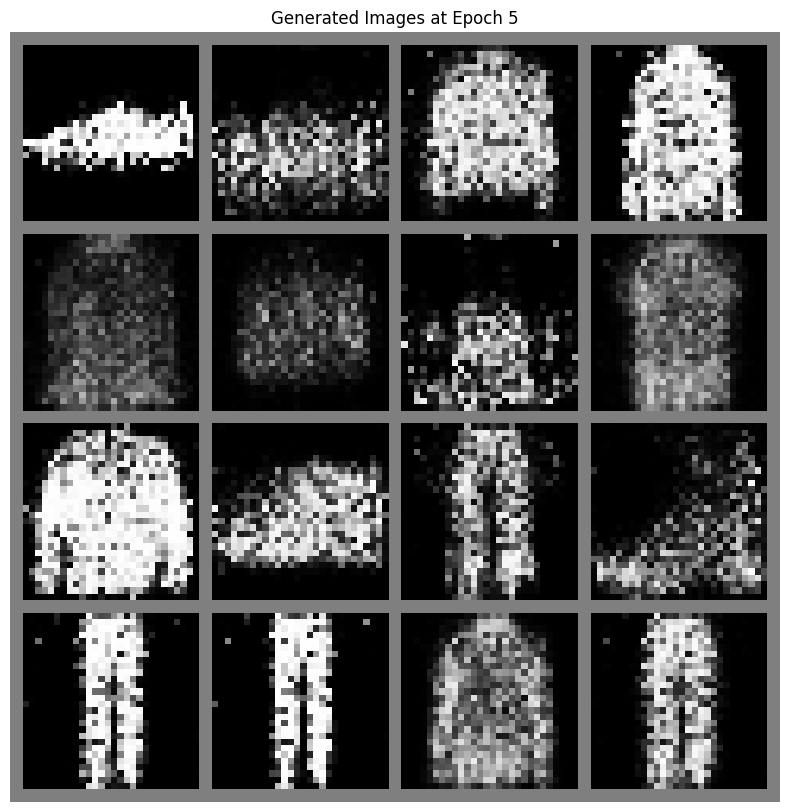

Epoch [6/50] | Generator Loss: 1.0306 | Discriminator Loss: 0.6289


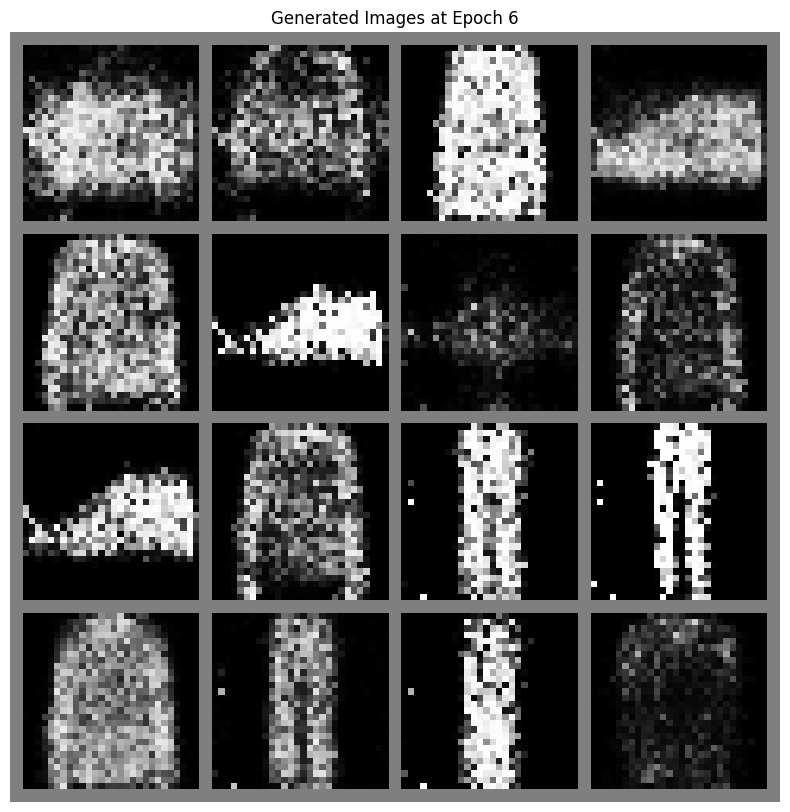

Epoch [7/50] | Generator Loss: 0.9764 | Discriminator Loss: 0.6397


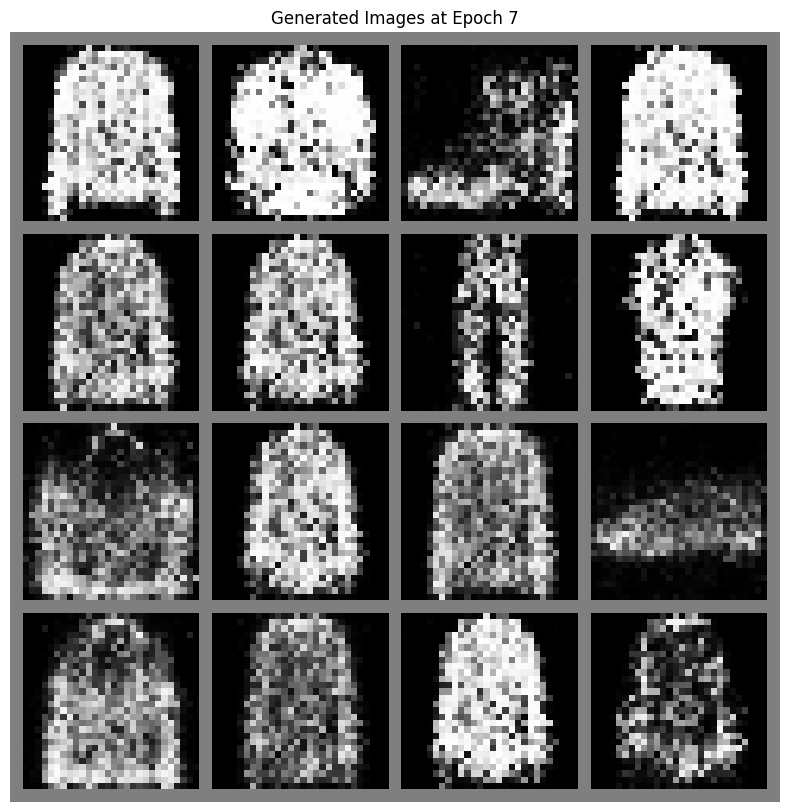

Epoch [8/50] | Generator Loss: 0.9392 | Discriminator Loss: 0.6459


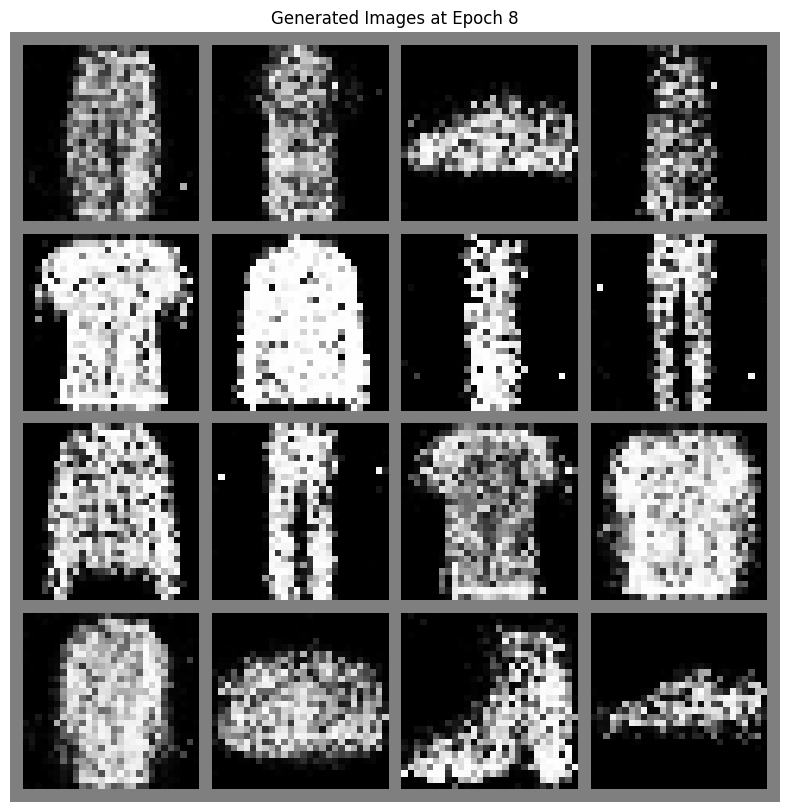

Epoch [9/50] | Generator Loss: 0.9305 | Discriminator Loss: 0.6468


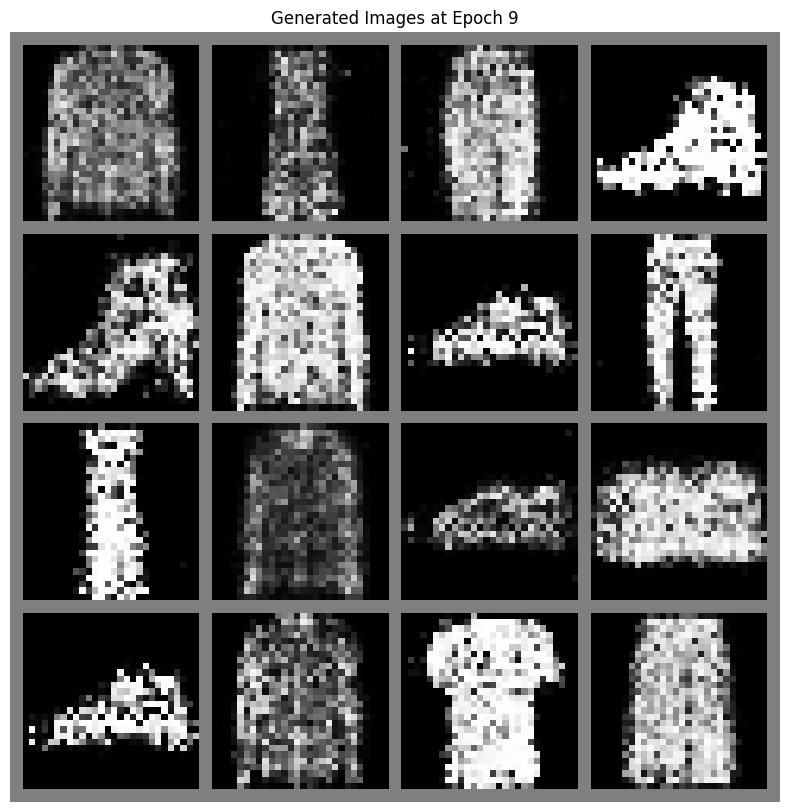

Epoch [10/50] | Generator Loss: 0.9249 | Discriminator Loss: 0.6460


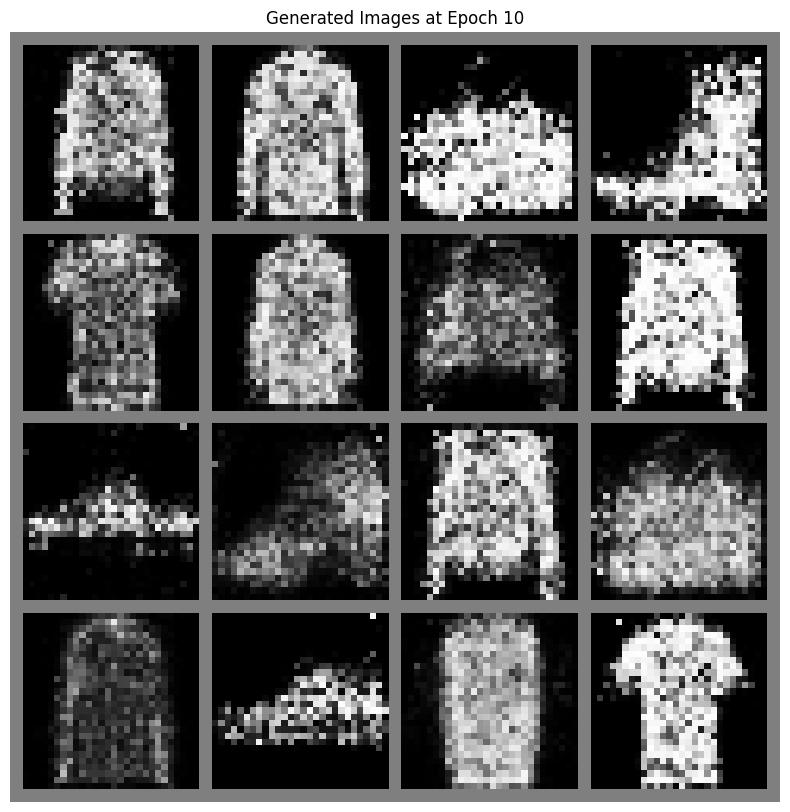

Epoch [11/50] | Generator Loss: 0.9030 | Discriminator Loss: 0.6517


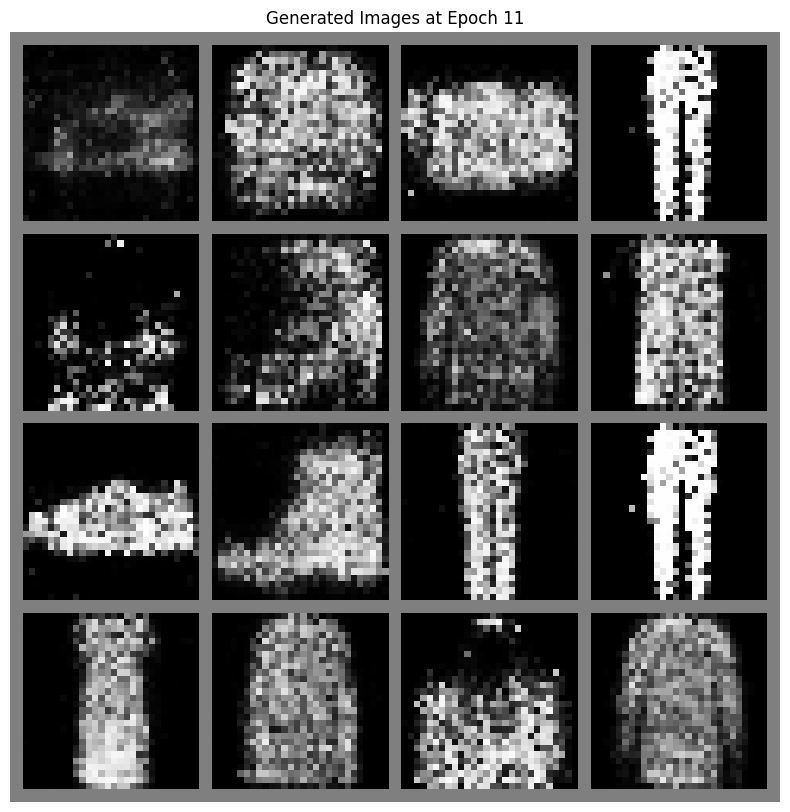

Epoch [12/50] | Generator Loss: 0.8909 | Discriminator Loss: 0.6573


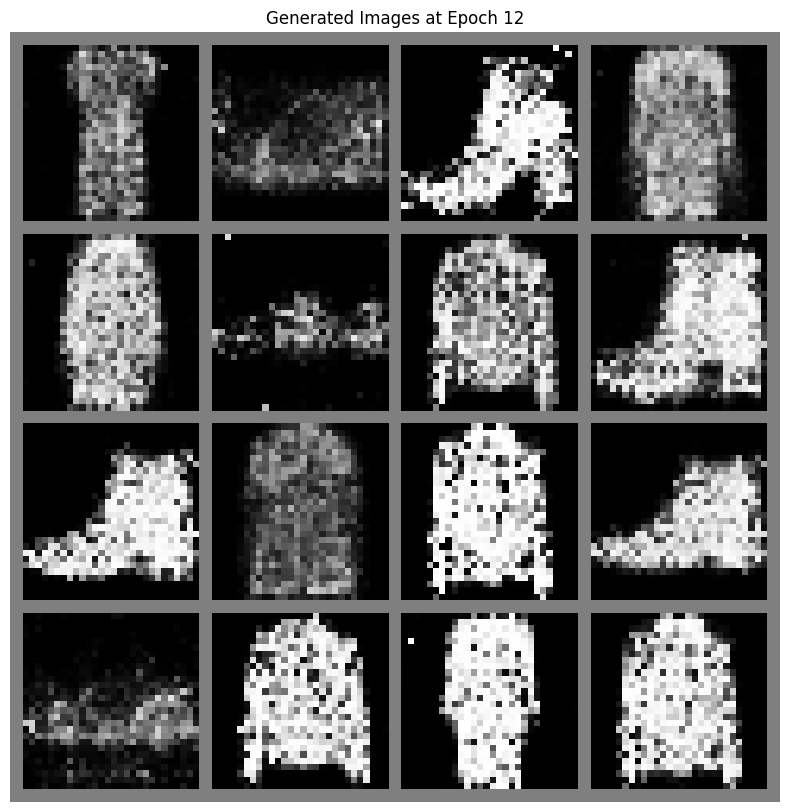

Epoch [13/50] | Generator Loss: 0.8740 | Discriminator Loss: 0.6610


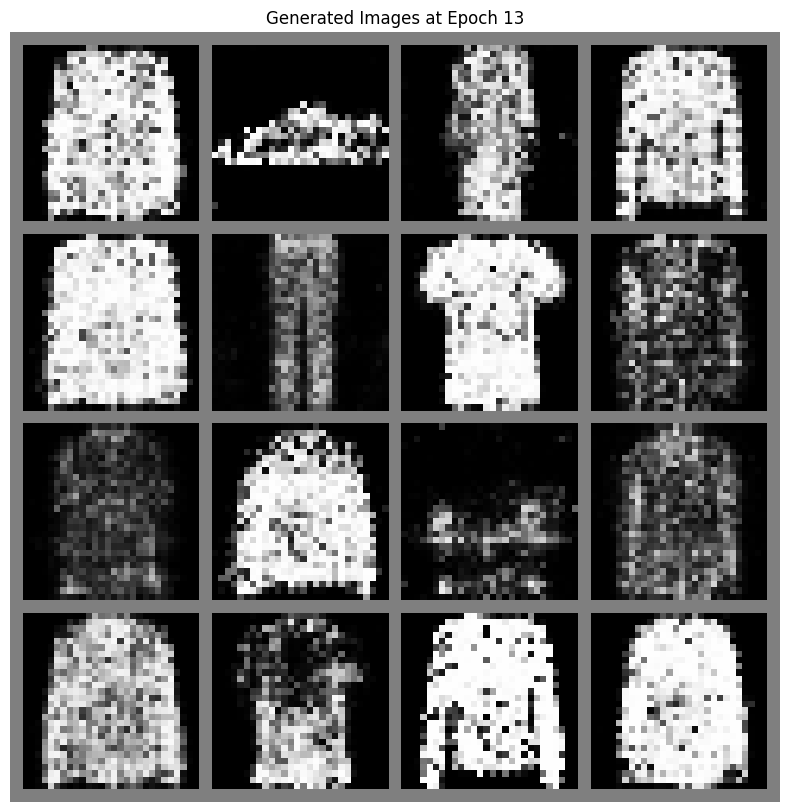

Epoch [14/50] | Generator Loss: 0.8664 | Discriminator Loss: 0.6614


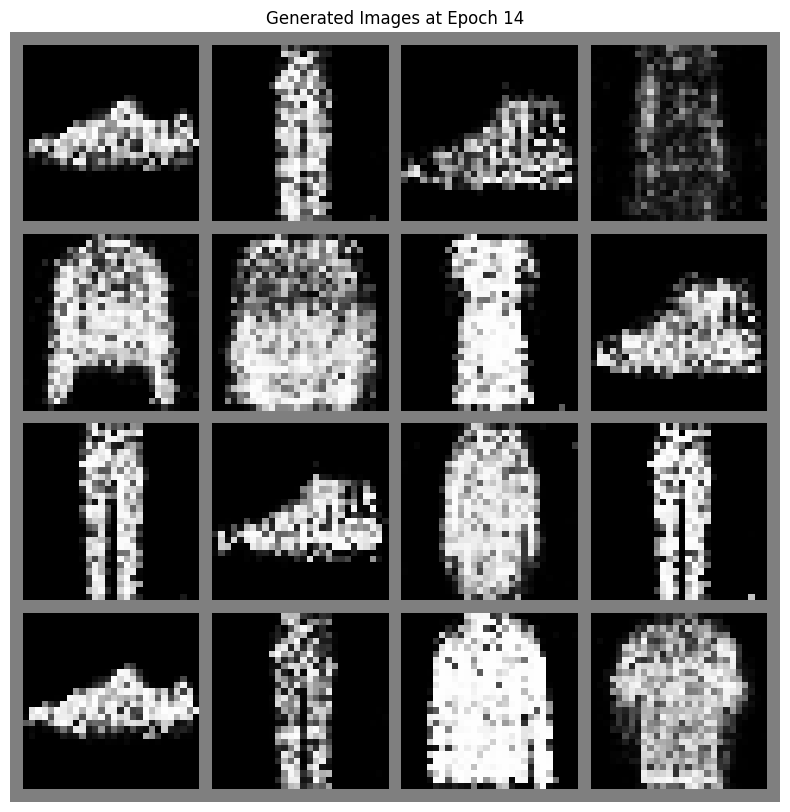

Epoch [15/50] | Generator Loss: 0.8733 | Discriminator Loss: 0.6607


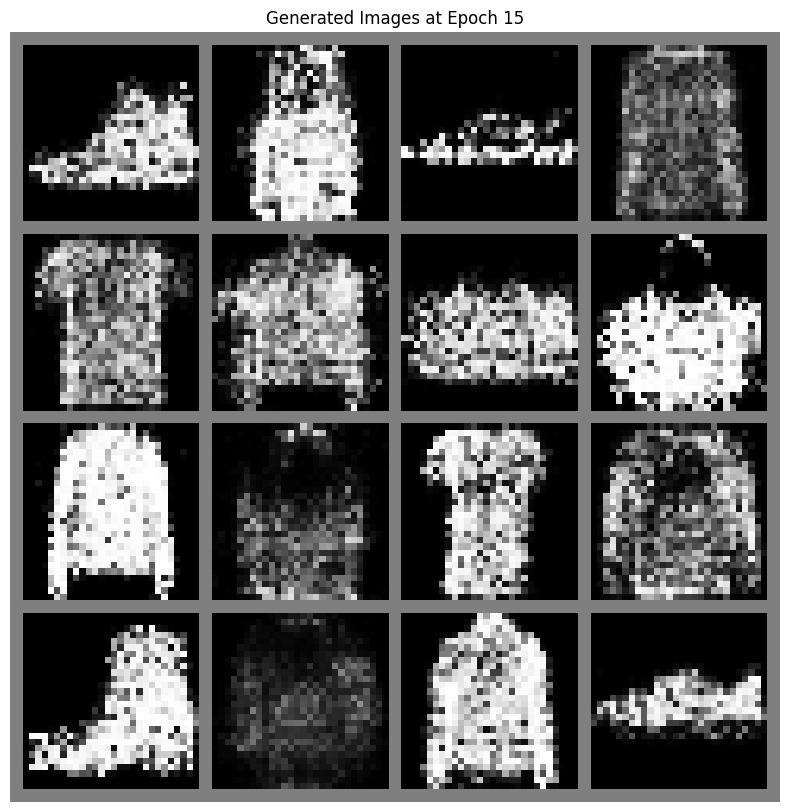

Epoch [16/50] | Generator Loss: 0.8608 | Discriminator Loss: 0.6627


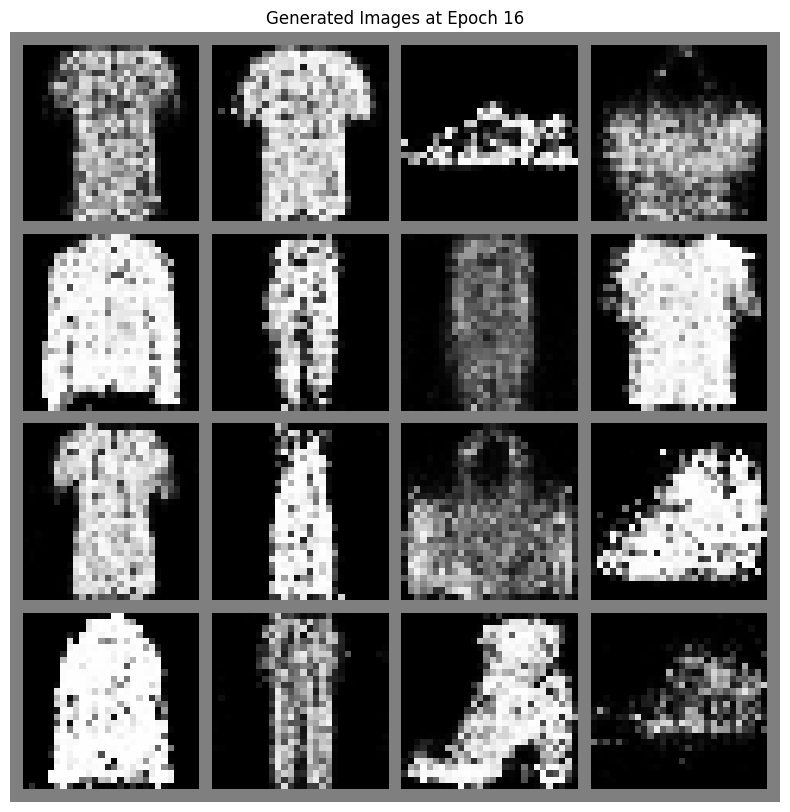

Epoch [17/50] | Generator Loss: 0.8492 | Discriminator Loss: 0.6650


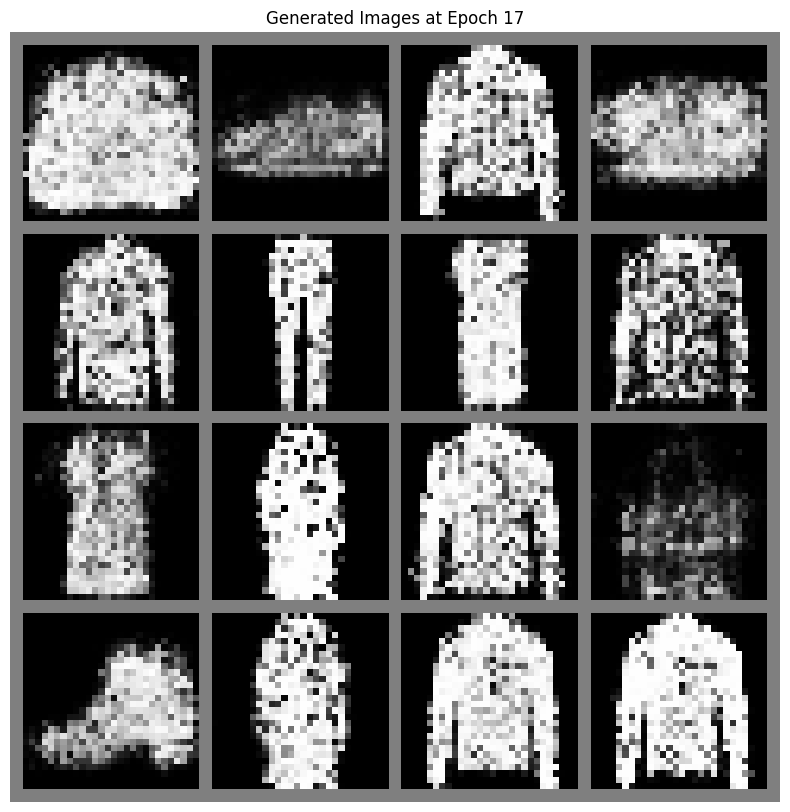

Epoch [18/50] | Generator Loss: 0.8518 | Discriminator Loss: 0.6664


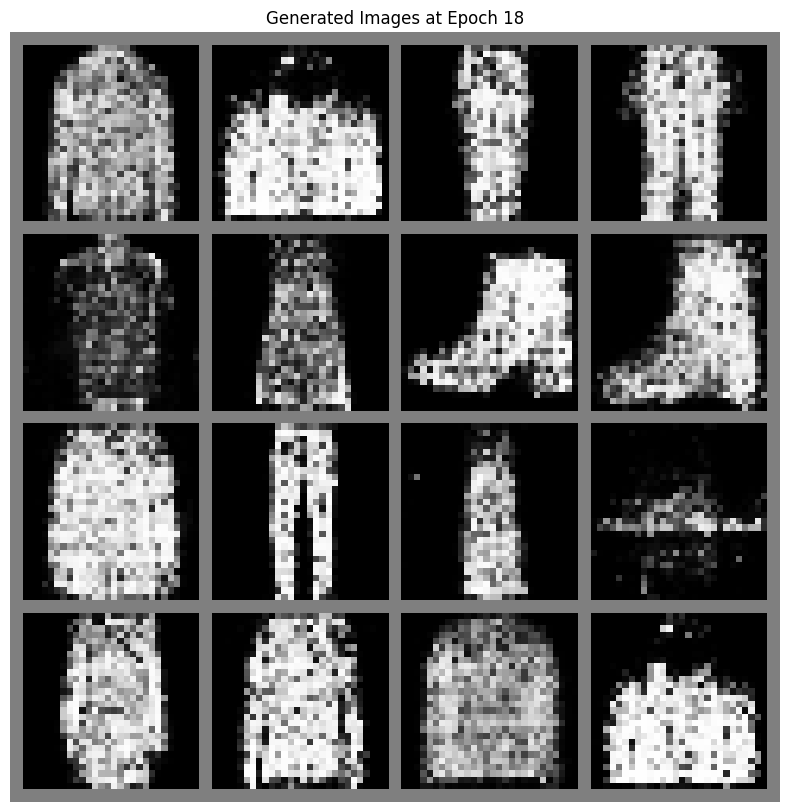

Epoch [19/50] | Generator Loss: 0.8465 | Discriminator Loss: 0.6663


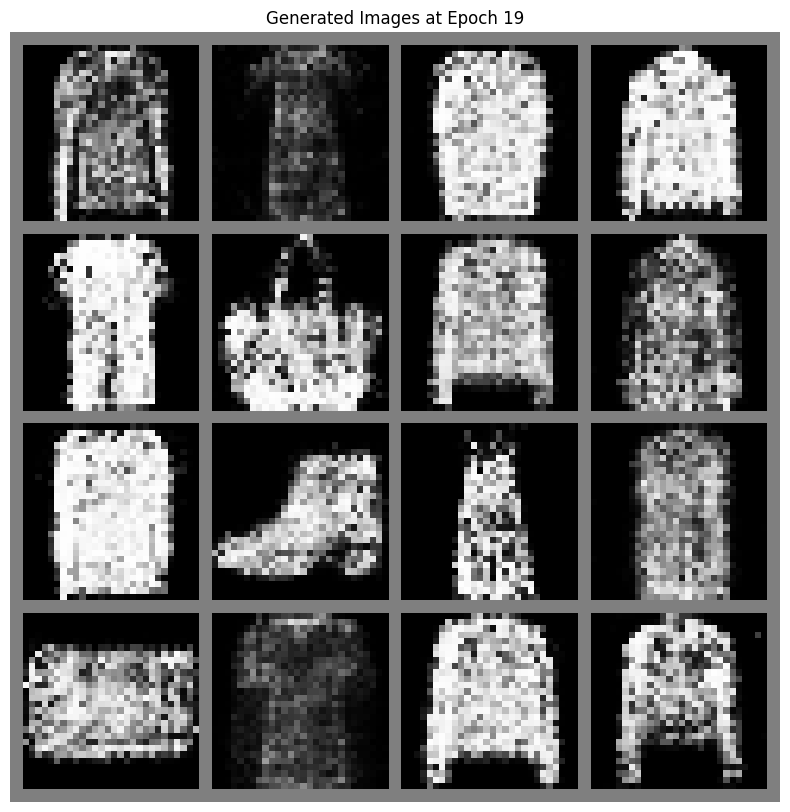

Epoch [20/50] | Generator Loss: 0.8448 | Discriminator Loss: 0.6665


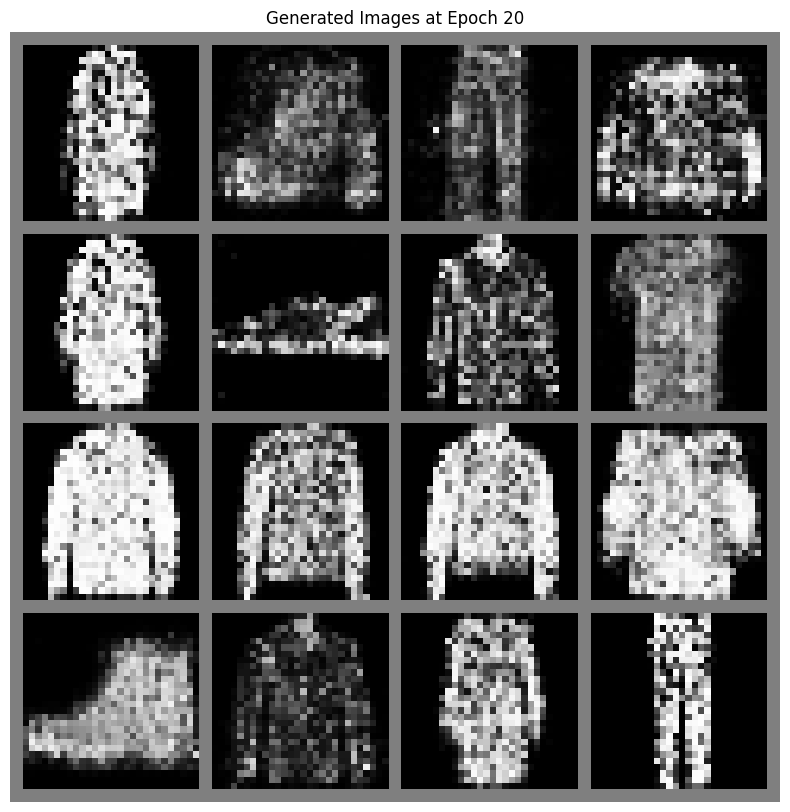

Epoch [21/50] | Generator Loss: 0.8413 | Discriminator Loss: 0.6675


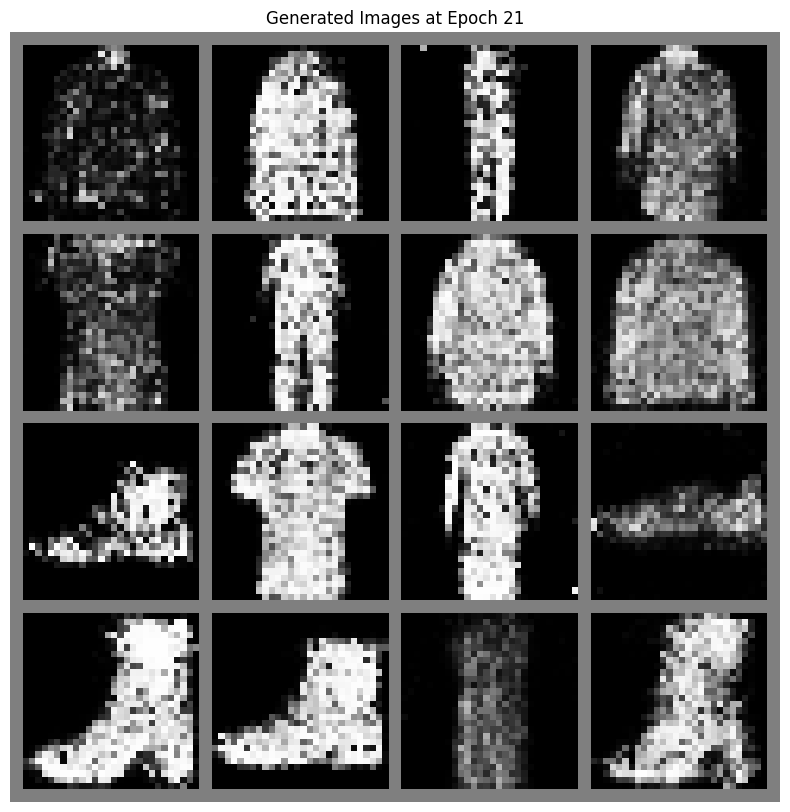

Epoch [22/50] | Generator Loss: 0.8435 | Discriminator Loss: 0.6670


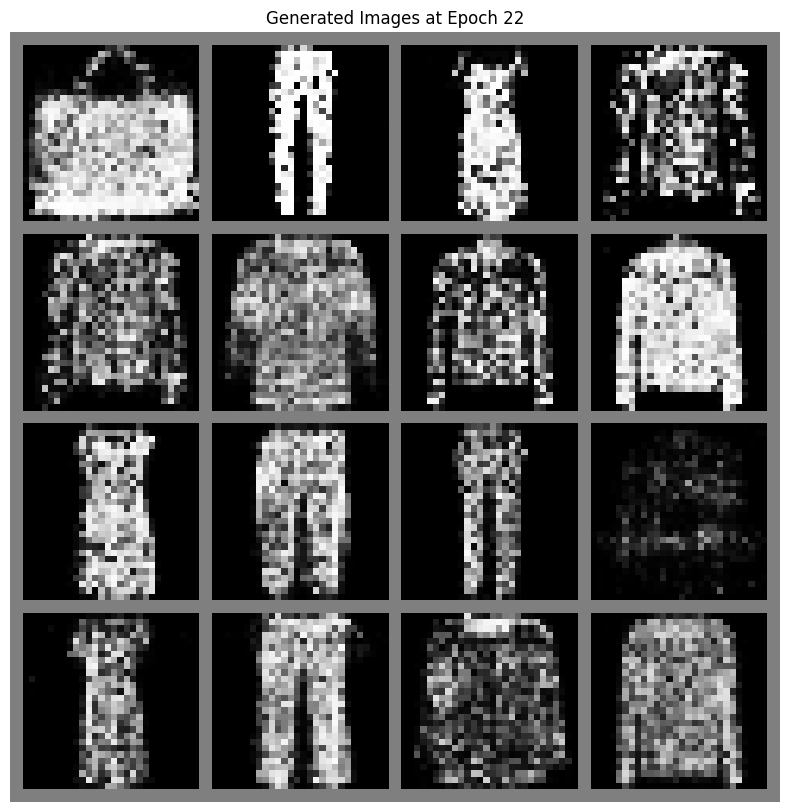

Epoch [23/50] | Generator Loss: 0.8450 | Discriminator Loss: 0.6663


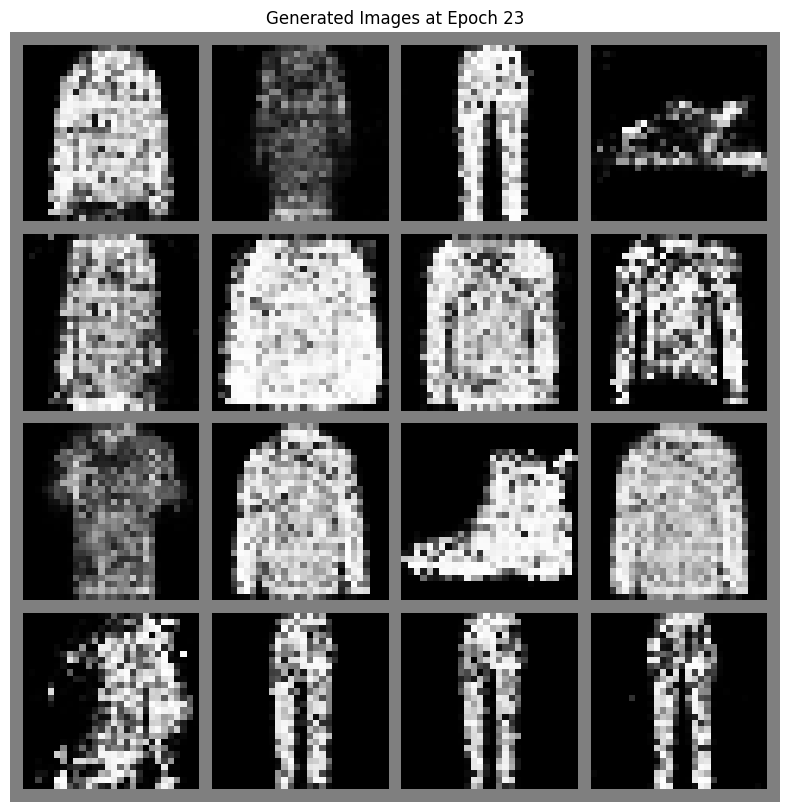

Epoch [24/50] | Generator Loss: 0.8465 | Discriminator Loss: 0.6652


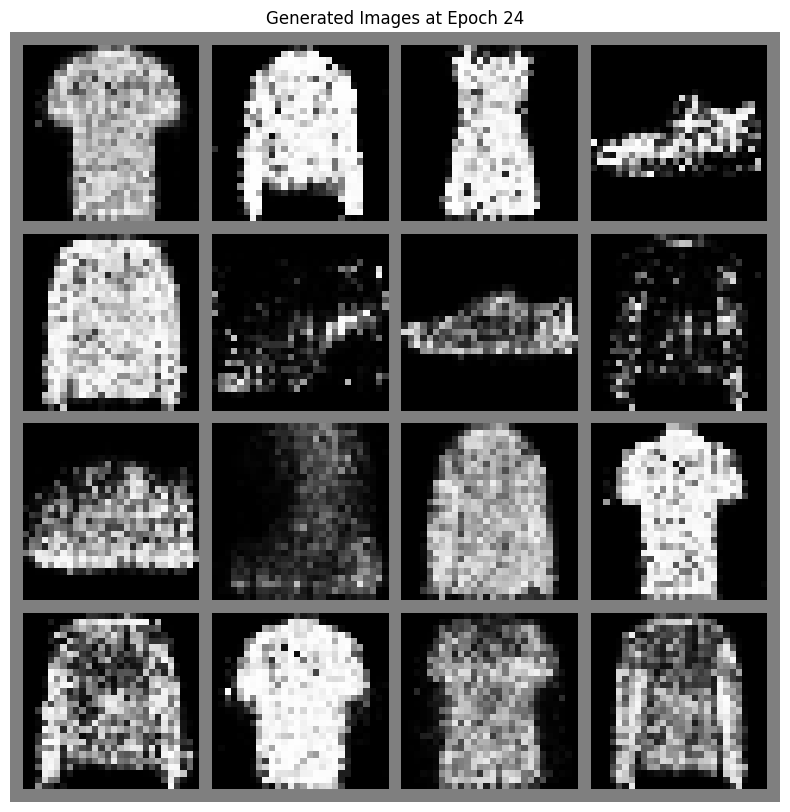

Epoch [25/50] | Generator Loss: 0.8433 | Discriminator Loss: 0.6658


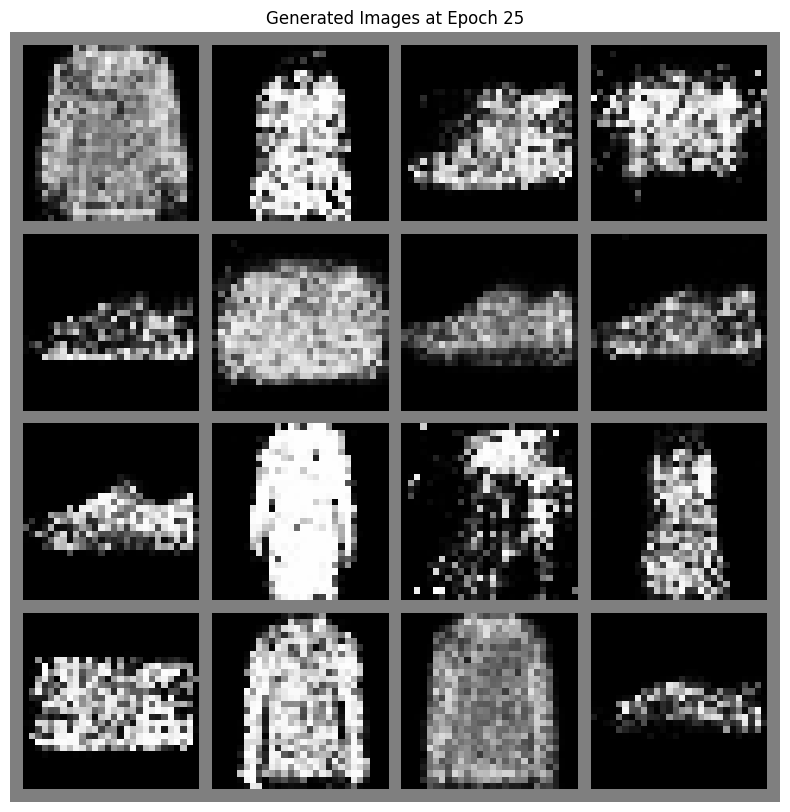

Epoch [26/50] | Generator Loss: 0.8470 | Discriminator Loss: 0.6659


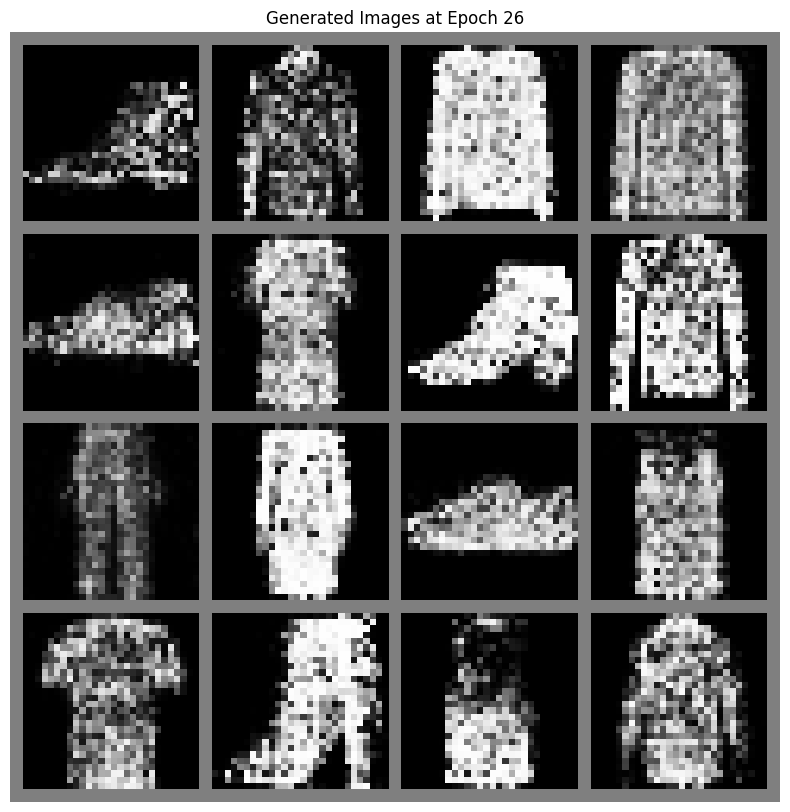

Epoch [27/50] | Generator Loss: 0.8496 | Discriminator Loss: 0.6646


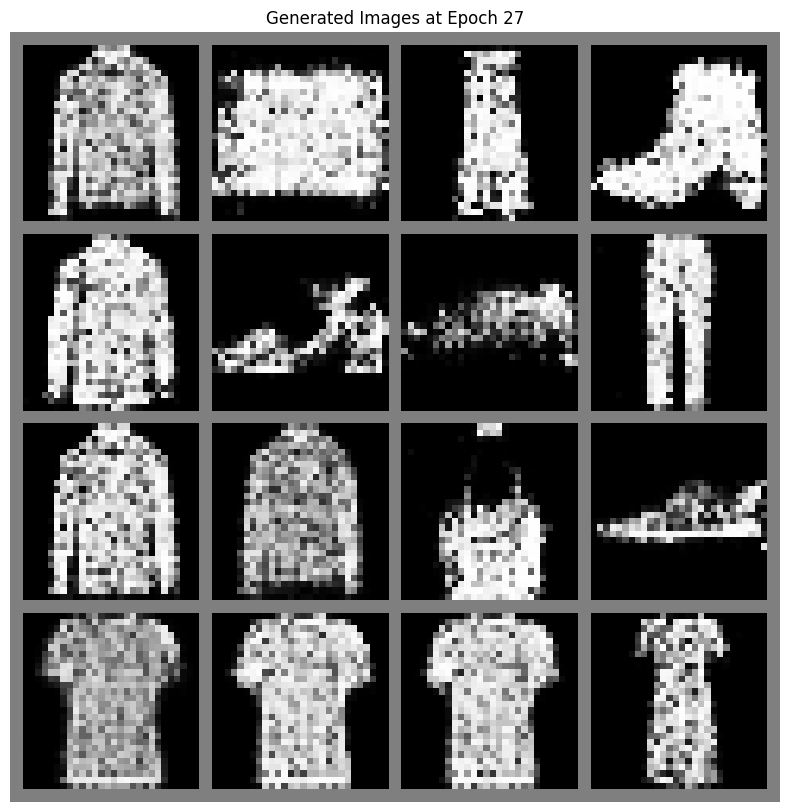

Epoch [28/50] | Generator Loss: 0.8476 | Discriminator Loss: 0.6636


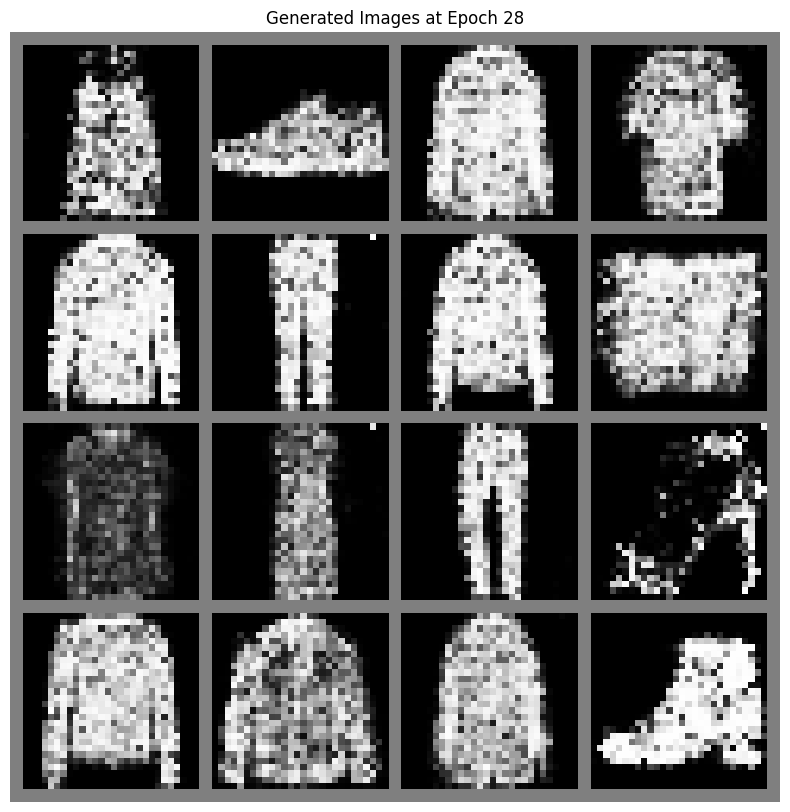

Epoch [29/50] | Generator Loss: 0.8471 | Discriminator Loss: 0.6637


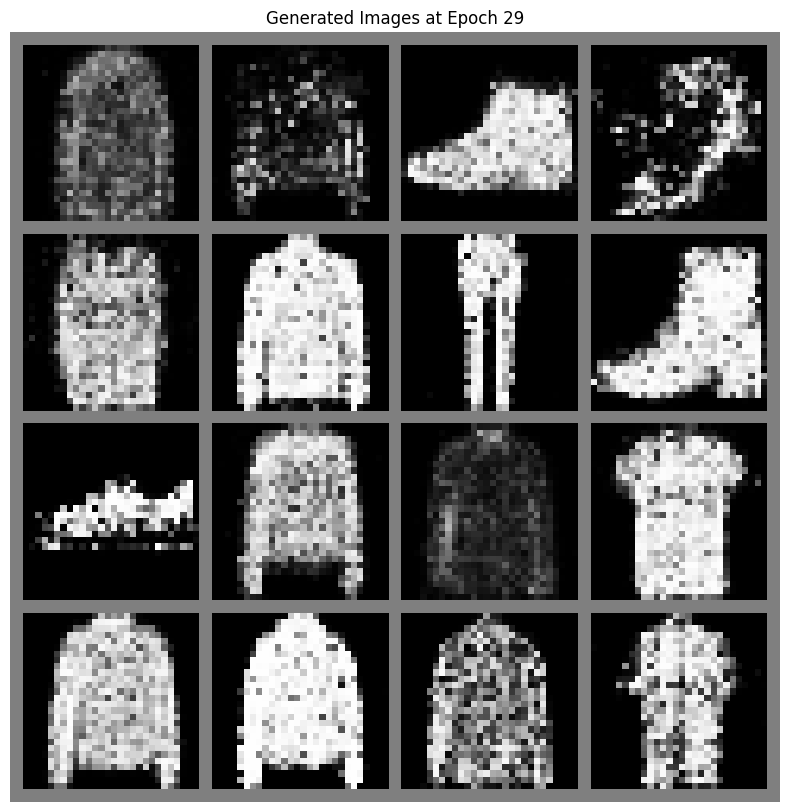

Epoch [30/50] | Generator Loss: 0.8529 | Discriminator Loss: 0.6630


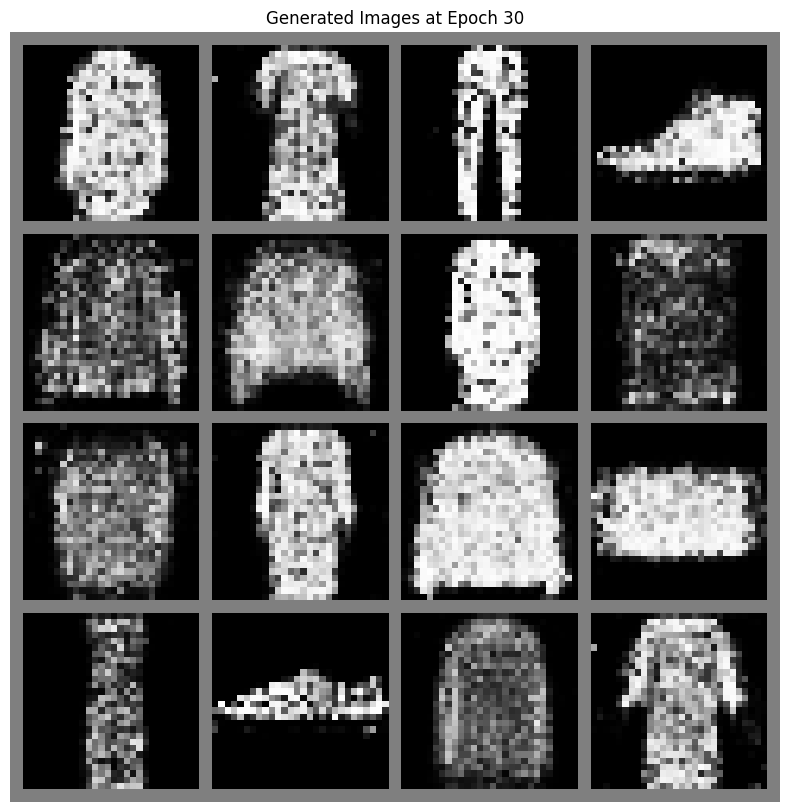

Epoch [31/50] | Generator Loss: 0.8502 | Discriminator Loss: 0.6631


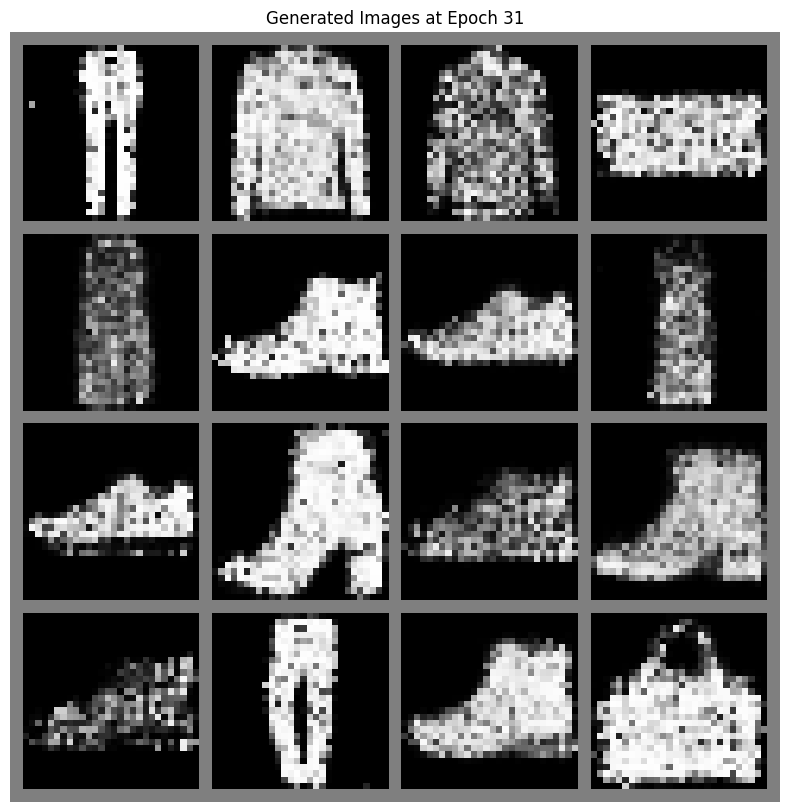

Epoch [32/50] | Generator Loss: 0.8542 | Discriminator Loss: 0.6620


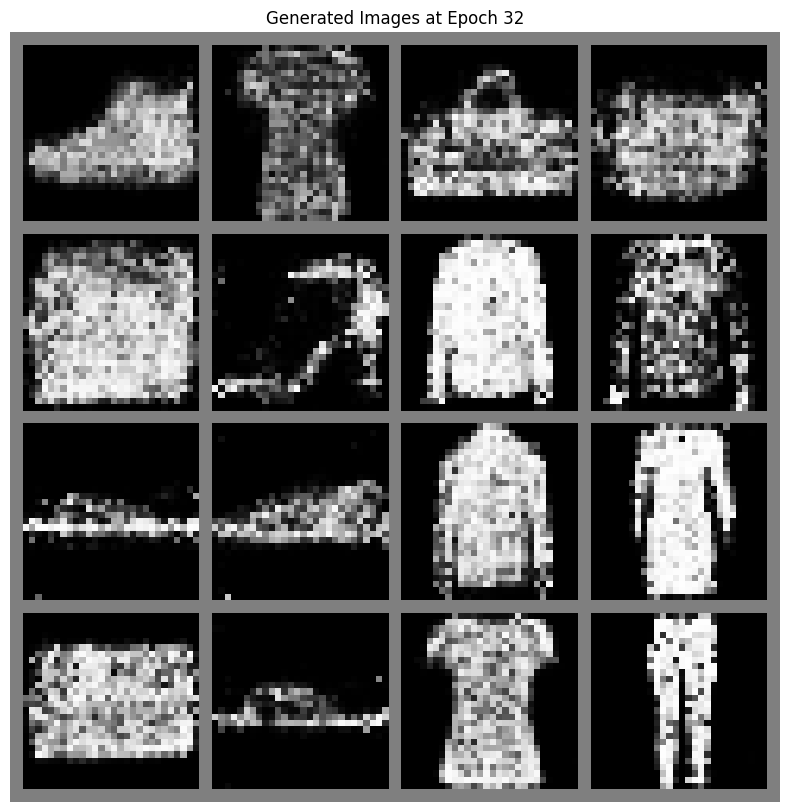

Epoch [33/50] | Generator Loss: 0.8633 | Discriminator Loss: 0.6599


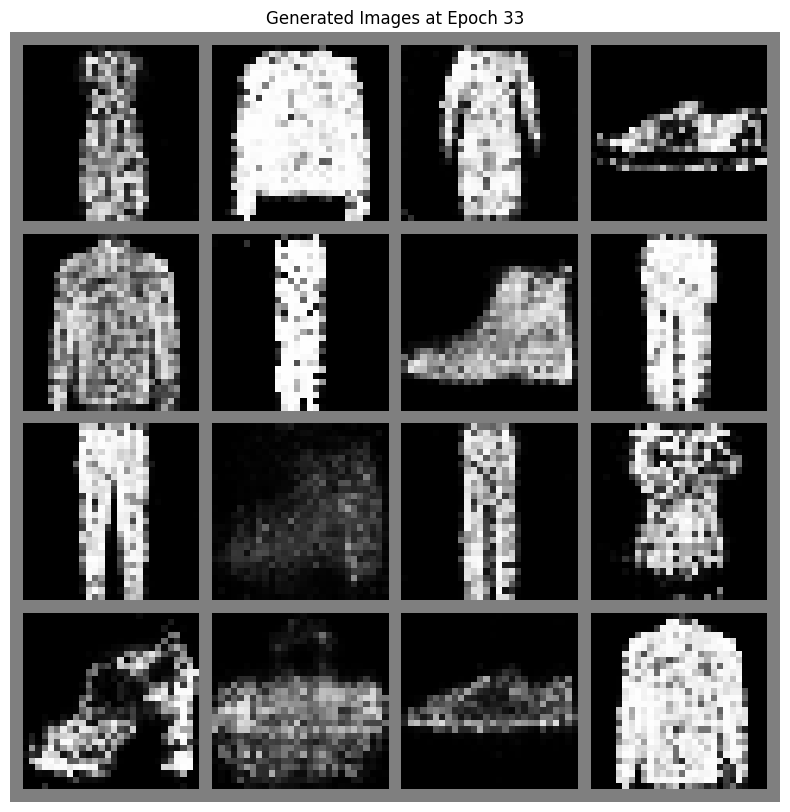

Epoch [34/50] | Generator Loss: 0.8645 | Discriminator Loss: 0.6596


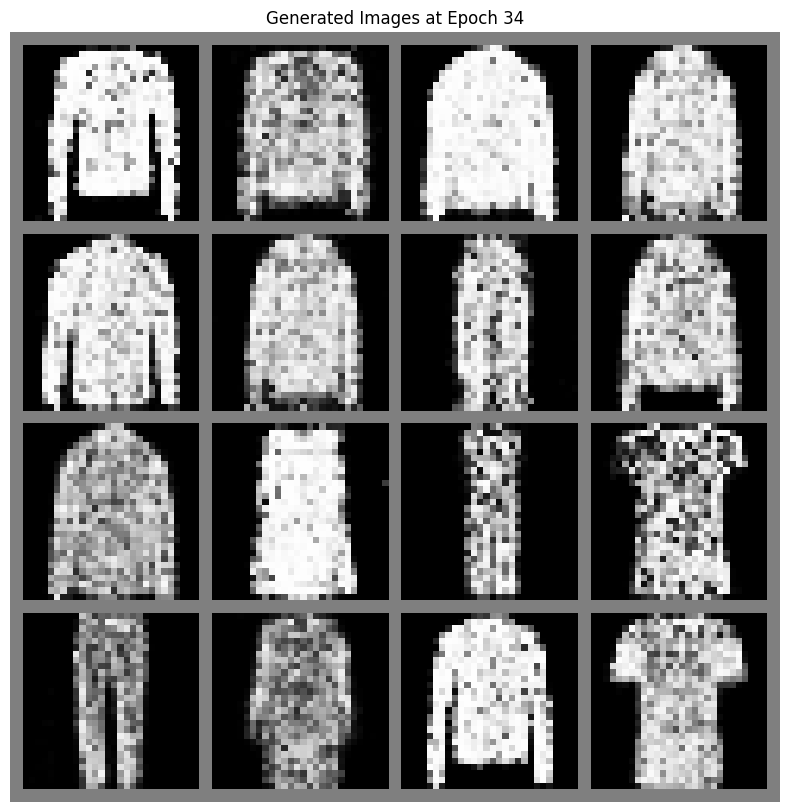

Epoch [35/50] | Generator Loss: 0.8604 | Discriminator Loss: 0.6601


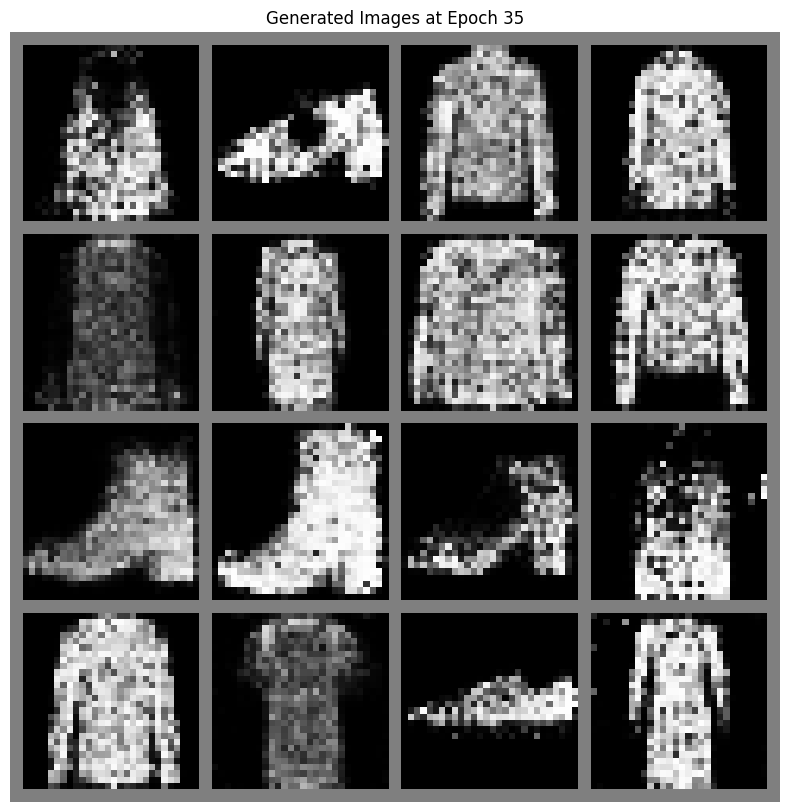

Epoch [36/50] | Generator Loss: 0.8626 | Discriminator Loss: 0.6589


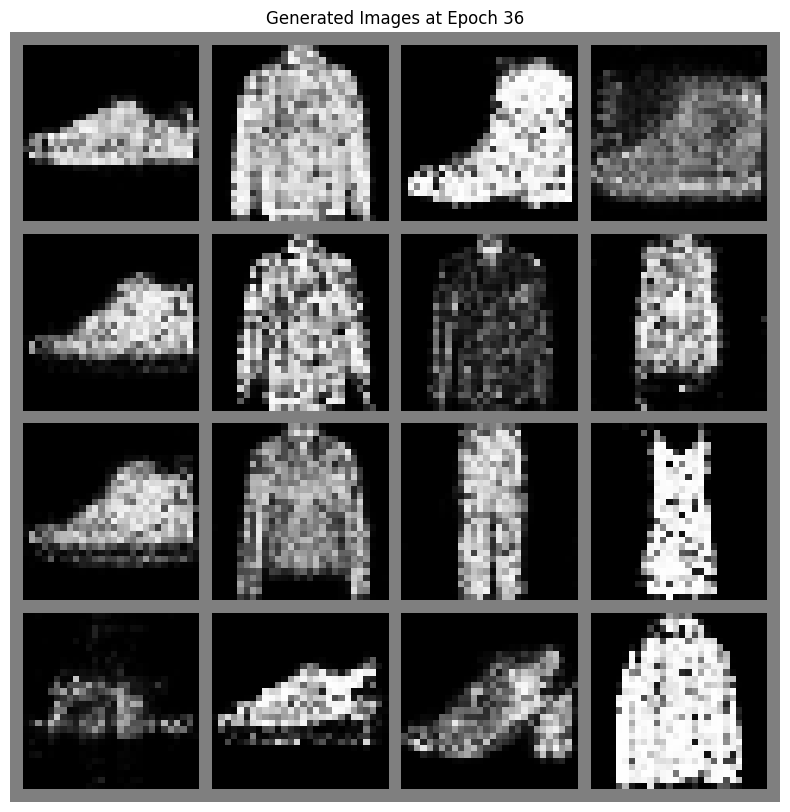

Epoch [37/50] | Generator Loss: 0.8644 | Discriminator Loss: 0.6582


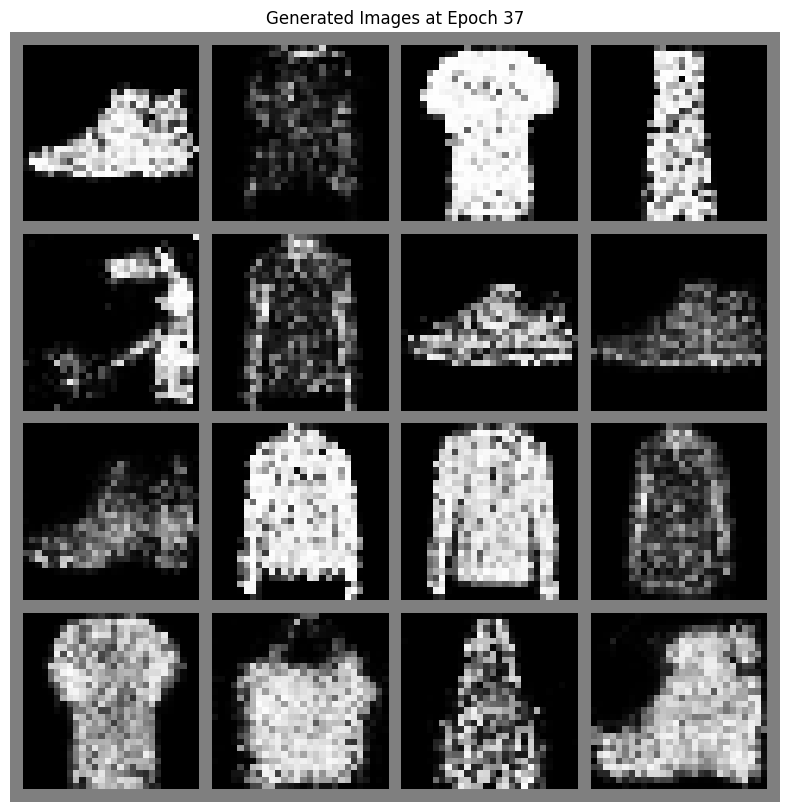

Epoch [38/50] | Generator Loss: 0.8682 | Discriminator Loss: 0.6578


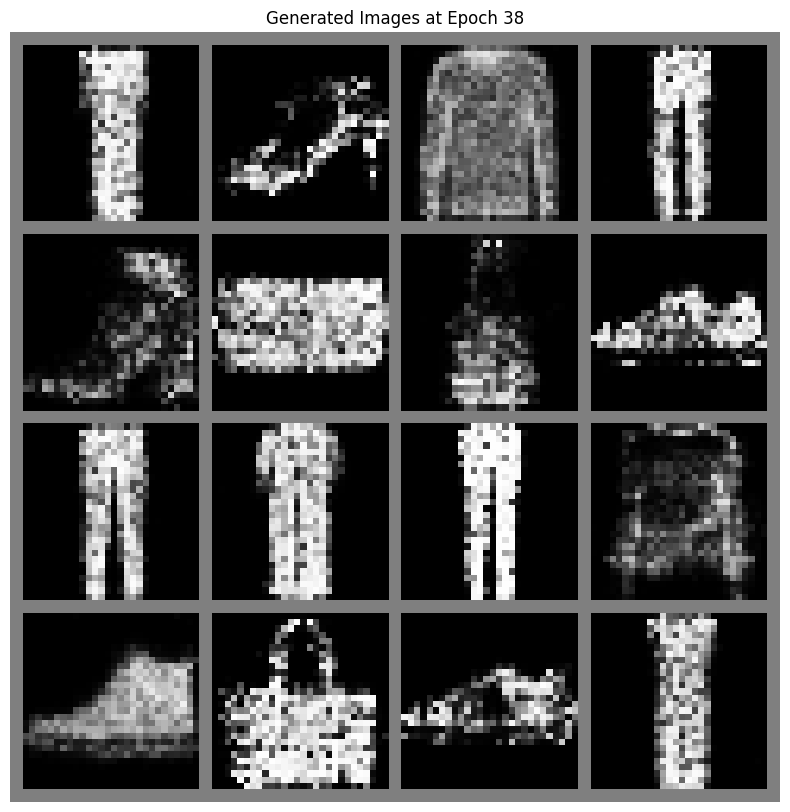

Epoch [39/50] | Generator Loss: 0.8686 | Discriminator Loss: 0.6568


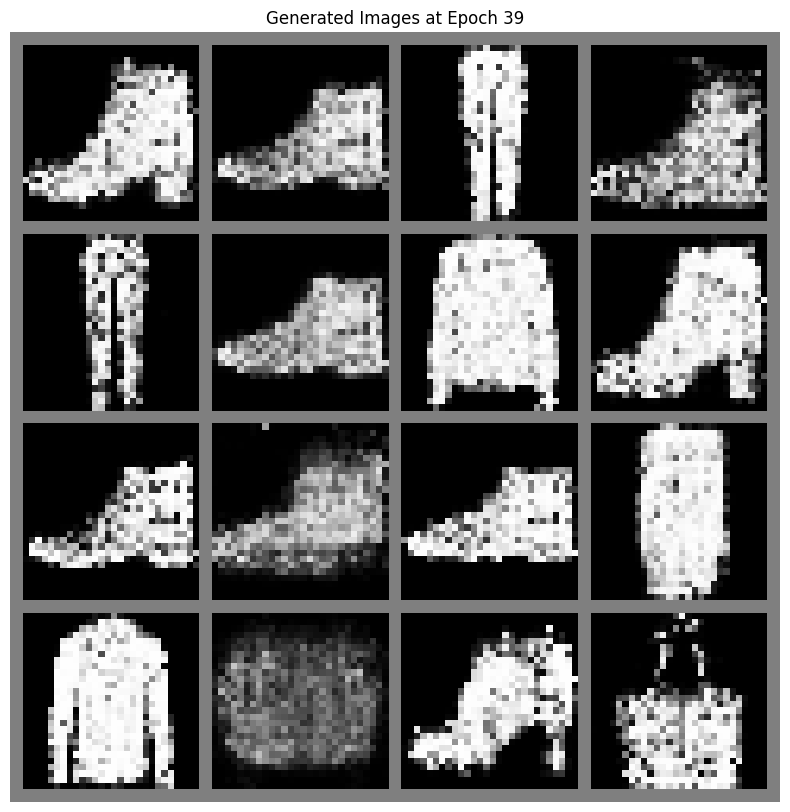

Epoch [40/50] | Generator Loss: 0.8726 | Discriminator Loss: 0.6570


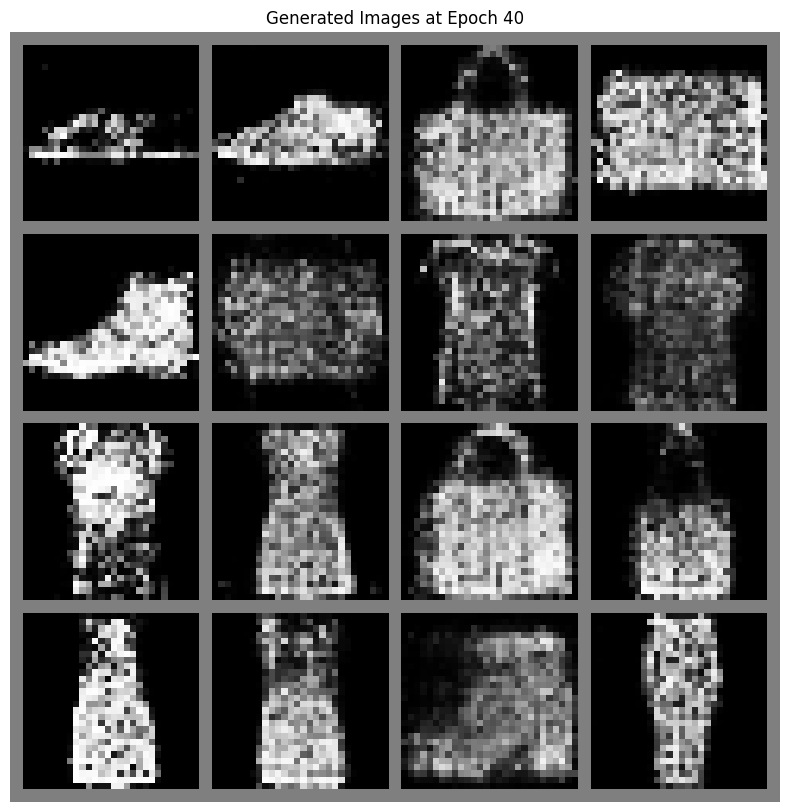

Epoch [41/50] | Generator Loss: 0.8707 | Discriminator Loss: 0.6568


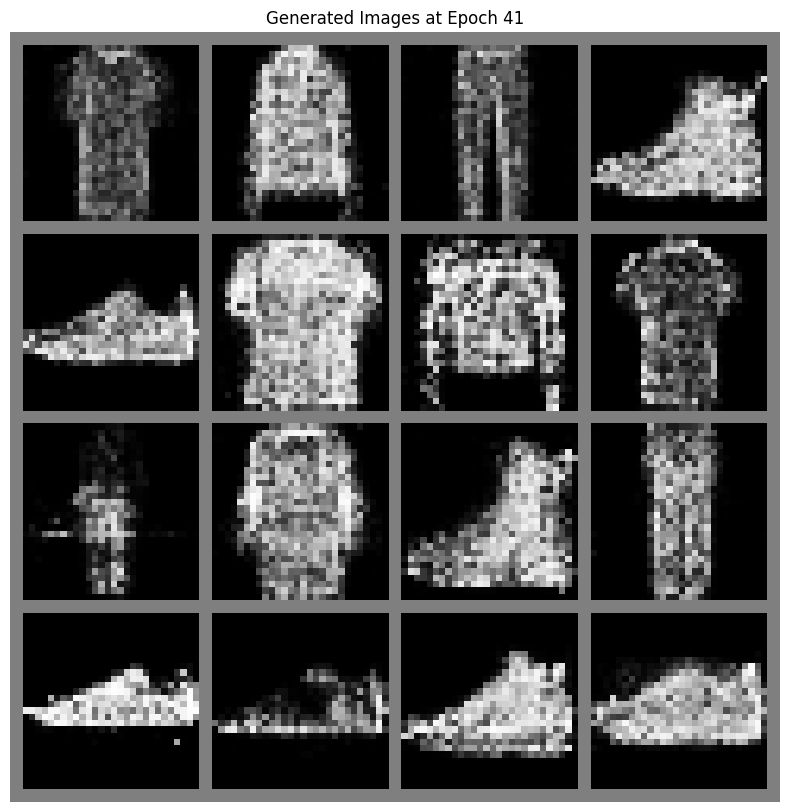

Epoch [42/50] | Generator Loss: 0.8773 | Discriminator Loss: 0.6547


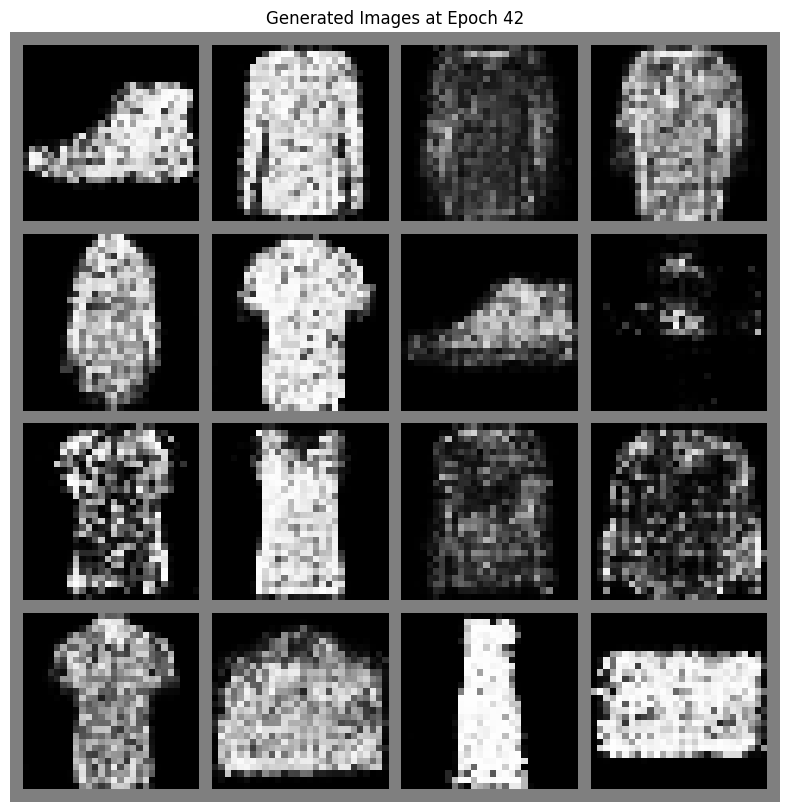

Epoch [43/50] | Generator Loss: 0.8808 | Discriminator Loss: 0.6542


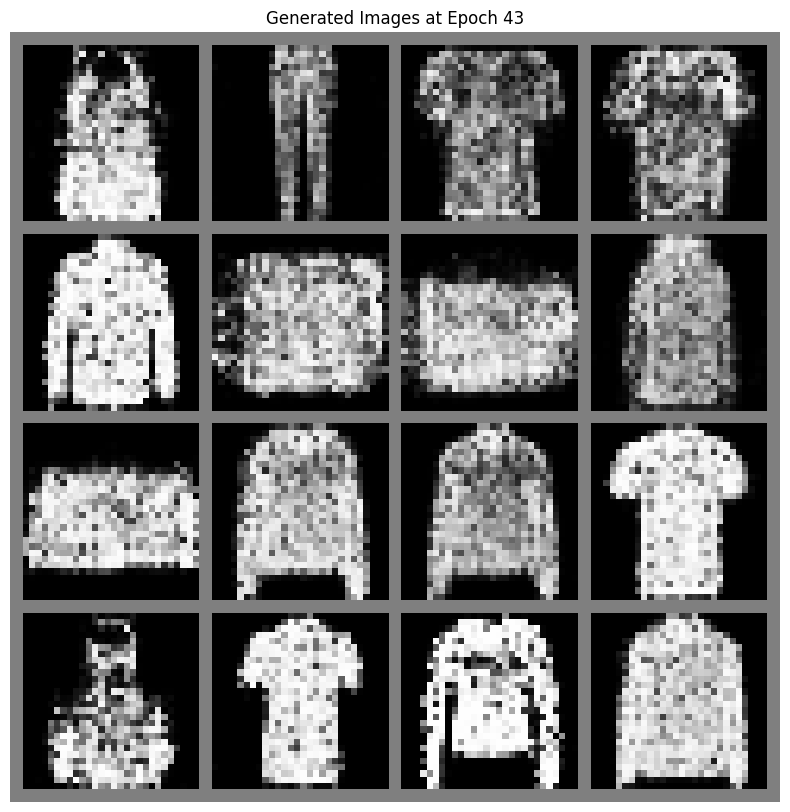

Epoch [44/50] | Generator Loss: 0.8831 | Discriminator Loss: 0.6537


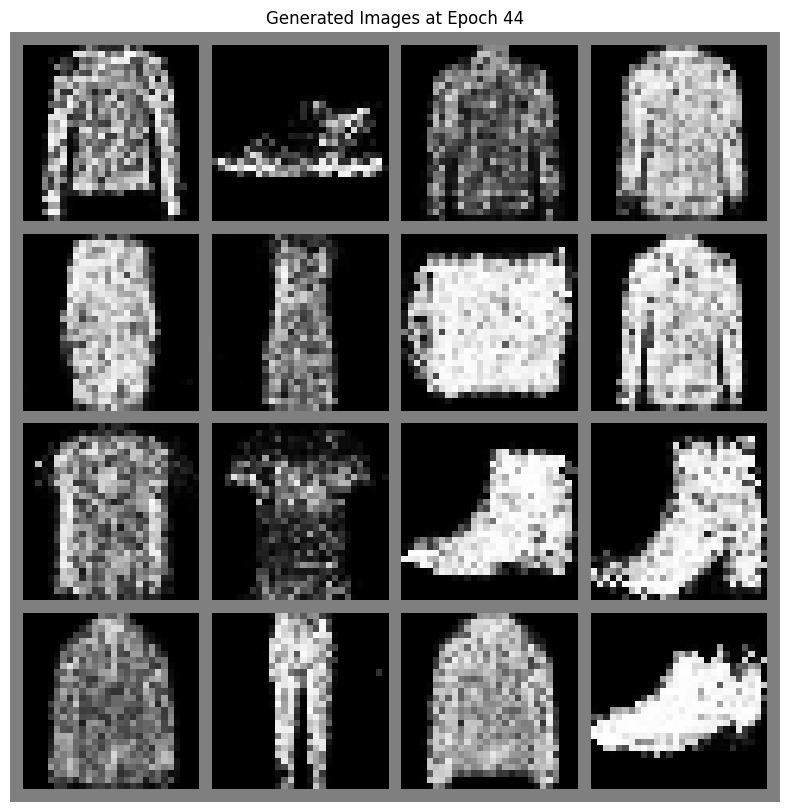

Epoch [45/50] | Generator Loss: 0.8839 | Discriminator Loss: 0.6527


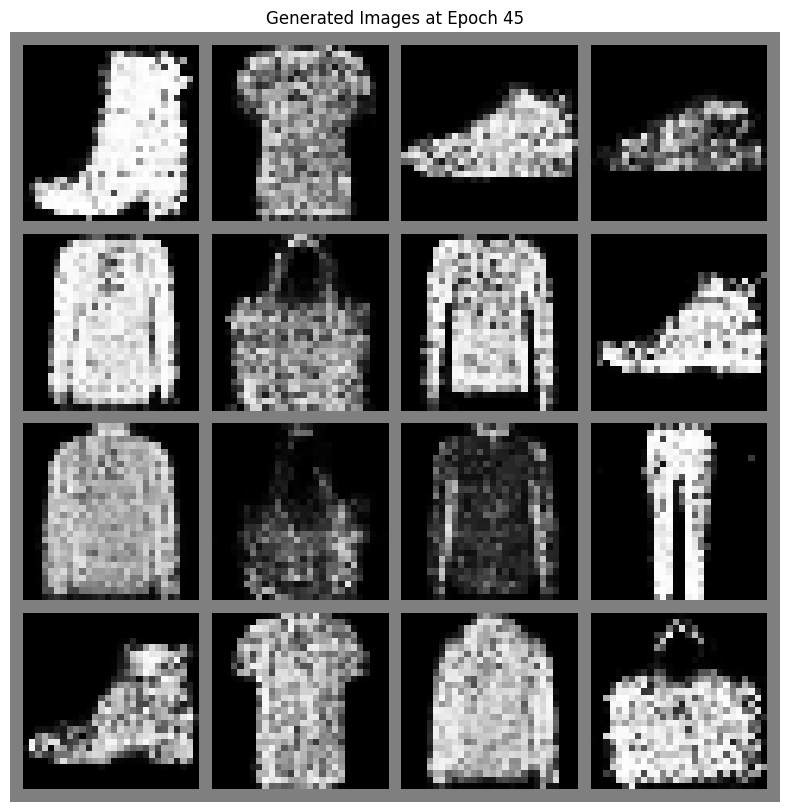

Epoch [46/50] | Generator Loss: 0.8820 | Discriminator Loss: 0.6534


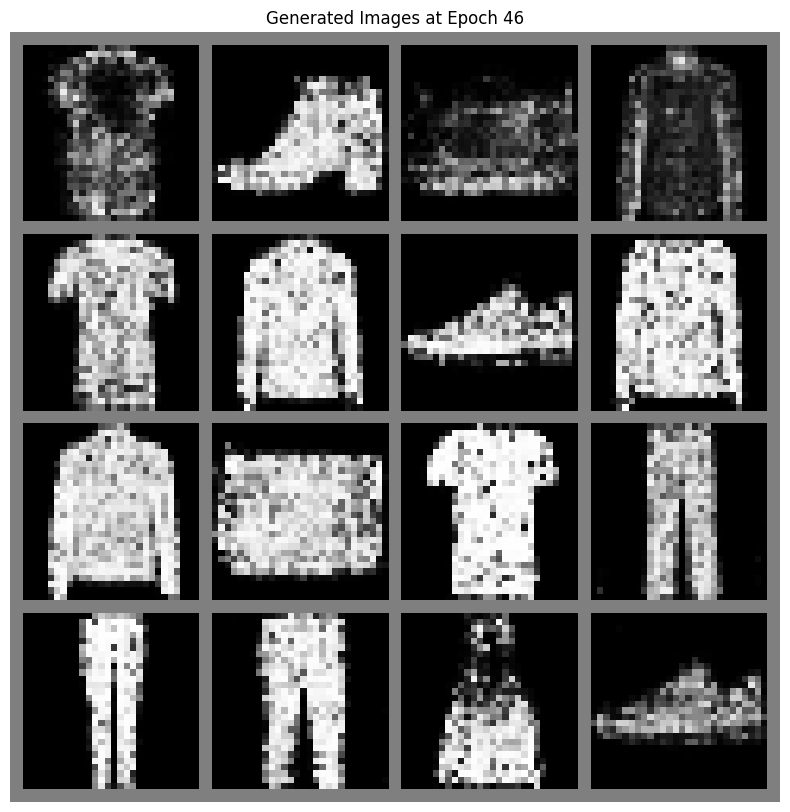

Epoch [47/50] | Generator Loss: 0.8882 | Discriminator Loss: 0.6514


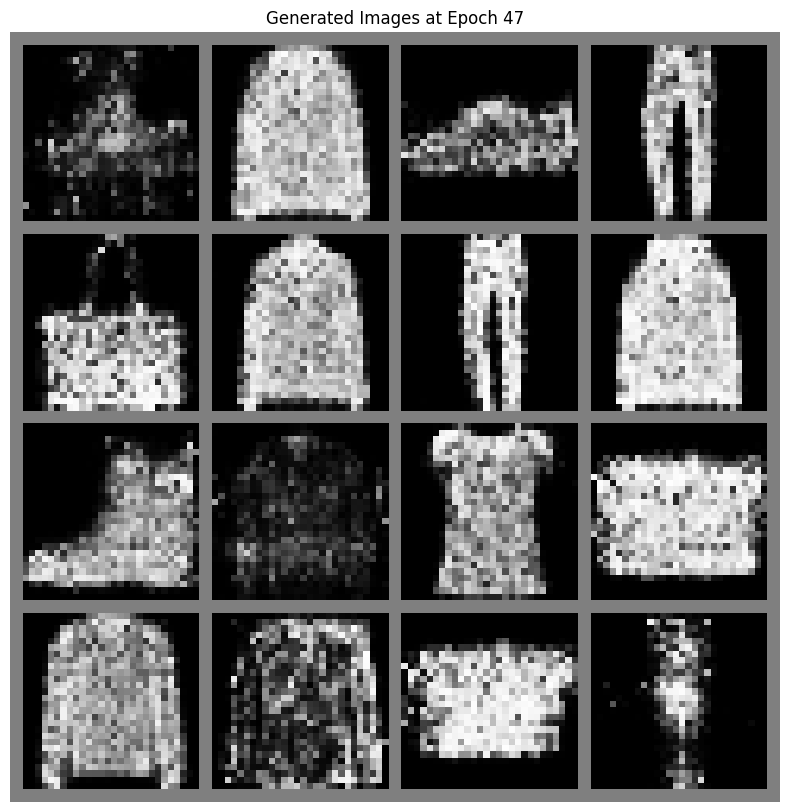

Epoch [48/50] | Generator Loss: 0.8928 | Discriminator Loss: 0.6509


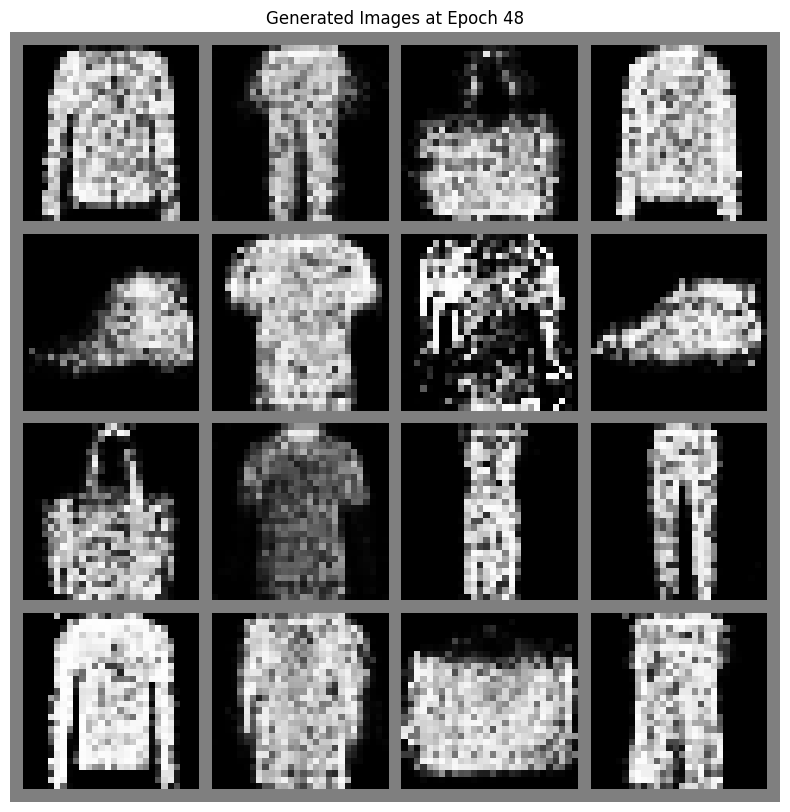

Epoch [49/50] | Generator Loss: 0.8887 | Discriminator Loss: 0.6521


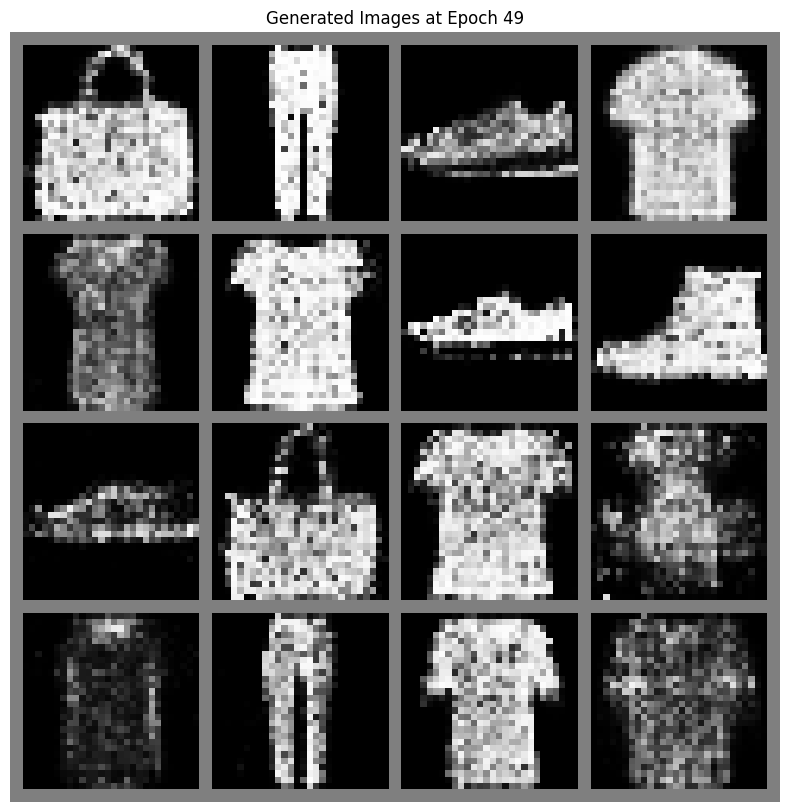

Epoch [50/50] | Generator Loss: 0.8960 | Discriminator Loss: 0.6499


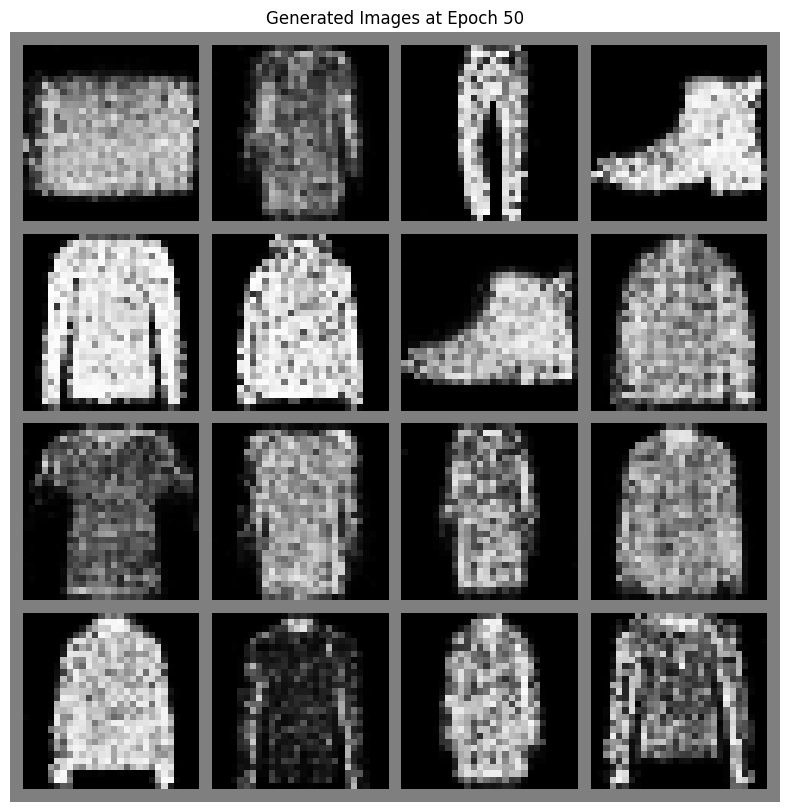

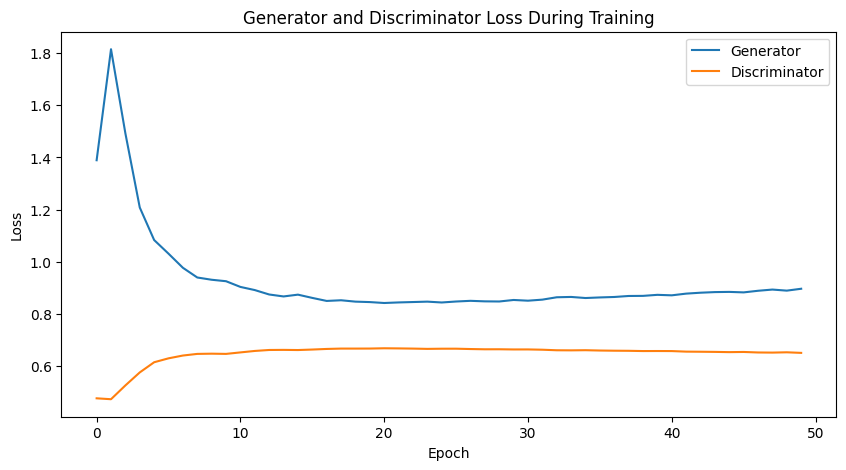

Training completed.


In [5]:
num_epochs = 50
checkpoint_interval = 10

g_losses = []
d_losses = []

# Function to visualize generated images
def visualize_generated_images(epoch, generator, device, num_images=16):
    with torch.no_grad():
        noise = torch.randn(num_images, 100, device=device)
        generated_images = generator(noise)
        grid = make_grid(generated_images, nrow=4).detach().cpu()
        plt.figure(figsize=(10,10))
        plt.imshow(grid.numpy().transpose((1, 2, 0)) * 0.5 + 0.5)
        plt.title(f"Generated Images at Epoch {epoch}")
        plt.axis("off")
        plt.show()

for epoch in range(num_epochs):
    epoch_g_loss = 0.0
    epoch_d_loss = 0.0
    num_batches = 0
    
    for i, (images, _) in enumerate(trainloader):
        real_images = images.to(device)
        real_labels = torch.ones(images.size(0), 1, device=device)
        fake_labels = torch.zeros(images.size(0), 1, device=device)

        # Train Discriminator
        discriminator.zero_grad()
        loss_real = criterion(discriminator(real_images), real_labels)
        noise = torch.randn(images.size(0), 100, device=device)
        fake_images = generator(noise)
        loss_fake = criterion(discriminator(fake_images.detach()), fake_labels)
        d_loss = (loss_real + loss_fake) / 2
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        generator.zero_grad()
        g_loss = criterion(discriminator(fake_images), real_labels)
        g_loss.backward()
        g_optimizer.step()

        # Accumulate losses
        epoch_g_loss += g_loss.item()
        epoch_d_loss += d_loss.item()
        num_batches += 1

    # Average loss for the epoch
    avg_g_loss = epoch_g_loss / num_batches
    avg_d_loss = epoch_d_loss / num_batches
    g_losses.append(avg_g_loss)
    d_losses.append(avg_d_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Generator Loss: {avg_g_loss:.4f} | Discriminator Loss: {avg_d_loss:.4f}")
    
    # Visualize generated images at the end of each epoch
    visualize_generated_images(epoch+1, generator, device)

    if (epoch + 1) % checkpoint_interval == 0:
        torch.save(generator.state_dict(), f'generator_epoch_{epoch+1}.pth')
        torch.save(discriminator.state_dict(), f'discriminator_epoch_{epoch+1}.pth')

# Plot Losses after training
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses, label="Generator")
plt.plot(d_losses, label="Discriminator")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("Training completed.")